In [ ]:
import numpy as np # biblioteka do wygodnego i BARDZO OPTYMALNEGO operowania algebrą
import pandas # operowanie na tabelach danych (DataFrame)
import matplotlib.pyplot as plt # wizualizacje

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


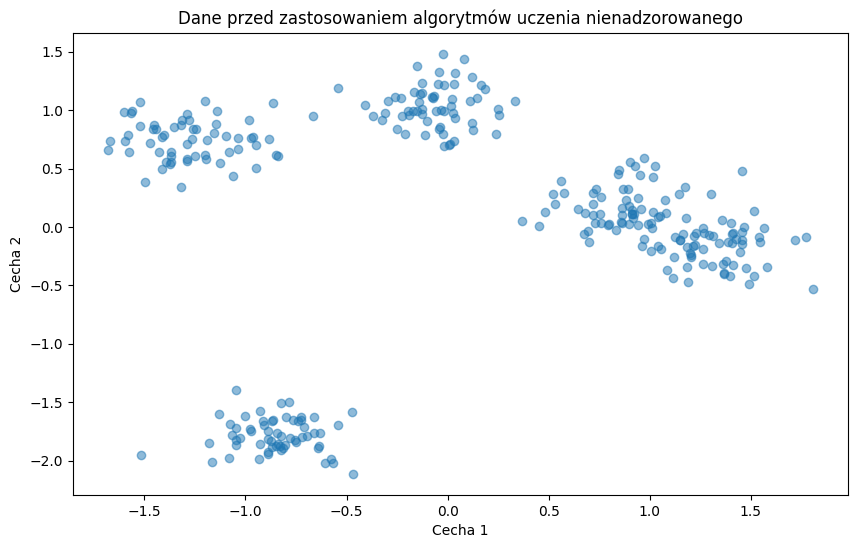

In [ ]:
X, _ = make_blobs(n_samples=300, centers=5, cluster_std=1, ## X_col => (X_col - mean) / std
                 shuffle=True, random_state=42) ## tworzymy dataset z pięcioma klastrami

### Normalizacja -> X_col => X - X_min / X_max - X_min => zawsze sprowadza dane do 0,1

### Aby użyć standaryzacji musimy założyć że X ma rozkład normalny
### Rozkład normalny stwierdzamy używając testów statystycznych (test Shapiro-Wilka)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #  dopasuj scaler i użyj

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.5)
plt.title('Dane przed zastosowaniem algorytmów uczenia nienadzorowanego')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit_predict(X_scaled)

array([0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 2, 1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 1, 0, 1, 2, 0,
       1, 0, 0, 2, 1, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 1,
       2, 2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1, 2, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1,
       0, 1, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 1, 2, 0, 2, 2, 0, 0, 2,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2, 0, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1,
       2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1,
       1, 0, 1, 1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2,
       2, 2, 1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 1, 0], d

In [ ]:
centers = kmeans.cluster_centers_
centers

array([[-0.6648787 ,  0.88852956],
       [ 1.08873712,  0.00261399],
       [-0.84771685, -1.7822871 ]])

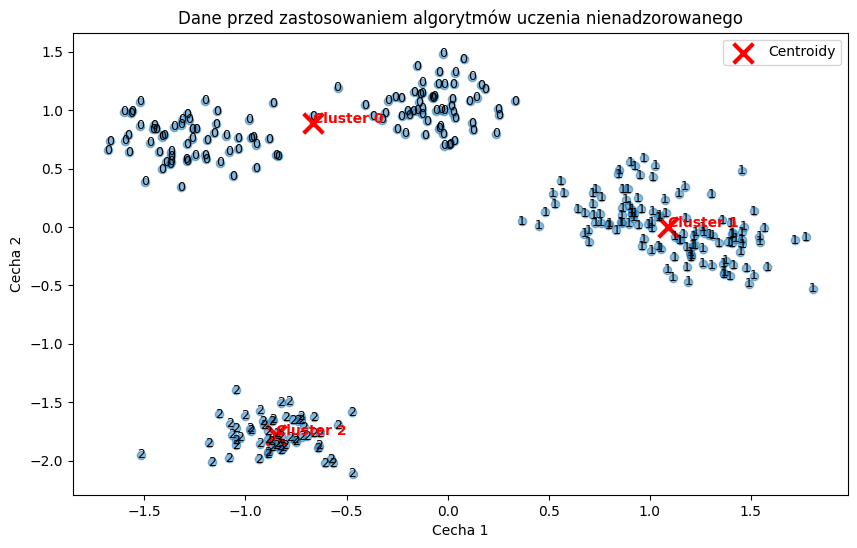

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.5)
plt.title('Dane przed zastosowaniem algorytmów uczenia nienadzorowanego')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x',
            s=200, linewidths=3, label='Centroidy')

for i, txt in enumerate(kmeans.labels_):
    plt.text(X_scaled[i, 0], X_scaled[i, 1], str(txt), fontsize=9, ha='center', va='center')

for i, center in enumerate(centers):
    plt.text(center[0], center[1], f'Cluster {i}', fontsize=10, fontweight='bold', color='red')

plt.legend()
plt.show()

In [ ]:
kmeans.labels_

kmeans.predict(
    [[0,0]]
    )

array([0, 4, 0, 2, 0, 3, 4, 1, 3, 4, 2, 0, 2, 0, 4, 0, 2, 2, 4, 0, 0, 2,
       0, 4, 4, 0, 1, 4, 2, 1, 0, 4, 4, 3, 1, 2, 2, 4, 3, 2, 0, 2, 1, 3,
       4, 3, 0, 1, 4, 1, 3, 4, 1, 3, 0, 3, 2, 0, 3, 1, 0, 3, 4, 4, 1, 2,
       1, 1, 1, 1, 2, 1, 3, 4, 3, 0, 3, 3, 4, 0, 1, 0, 0, 4, 0, 1, 3, 2,
       2, 4, 4, 4, 0, 4, 0, 0, 4, 3, 2, 4, 3, 3, 2, 1, 0, 0, 0, 2, 0, 2,
       3, 4, 2, 2, 0, 0, 0, 1, 3, 3, 3, 1, 3, 3, 0, 1, 4, 4, 3, 0, 2, 3,
       2, 0, 0, 0, 0, 2, 1, 4, 0, 3, 0, 2, 4, 0, 4, 1, 2, 1, 2, 1, 1, 2,
       0, 4, 1, 3, 0, 2, 3, 3, 4, 2, 0, 3, 4, 2, 2, 4, 1, 0, 2, 2, 0, 2,
       3, 2, 1, 1, 3, 3, 2, 1, 1, 4, 0, 3, 1, 2, 4, 1, 0, 1, 1, 3, 3, 1,
       4, 2, 3, 1, 4, 2, 3, 0, 0, 1, 1, 0, 1, 3, 4, 1, 0, 2, 3, 3, 1, 4,
       3, 3, 4, 3, 4, 2, 3, 4, 3, 4, 3, 2, 2, 1, 4, 2, 2, 2, 4, 0, 3, 2,
       1, 4, 1, 3, 4, 4, 1, 1, 2, 4, 3, 1, 3, 4, 1, 4, 1, 4, 1, 0, 4, 2,
       2, 0, 4, 2, 1, 2, 3, 1, 1, 0, 0, 3, 2, 2, 4, 4, 3, 0, 0, 2, 2, 1,
       1, 1, 4, 2, 3, 2, 1, 3, 0, 3, 1, 0, 4, 0], d

In [ ]:

kmeans.predict(
    [[0,0]]
    )

array([4], dtype=int32)

In [ ]:
# calculating Euclidean distance
# using linalg.norm()
# dist = np.linalg.norm(point1 - point2)


# 1. napisz kod ktory wyznaczy dystanse punktu (0,0) do centroidow
# 2. napisz funkcję show_centroids() która przyjmie wspolrzedne punktu i wypisze odległości do centroidów.
# 3. napisz kolejną funkcję która wykorzysta show_centroids () i zwróci True gdy przypisanie klastra
#    przez Kmeans bedzie zgodne z show_centroids()

for i, center in enumerate(centers):
   distance = np.linalg.norm([[0,0]] - center)
   print(f"Punkt {i}: {center}, Odległość od [0, 0]: {distance:.2f}")


Punkt 0: [-0.07178562  1.0319892 ], Odległość od [0, 0]: 1.03
Punkt 1: [-0.84771685 -1.7822871 ], Odległość od [0, 0]: 1.97
Punkt 2: [ 1.33004307 -0.1653677 ], Odległość od [0, 0]: 1.34
Punkt 3: [-1.27807662  0.74020688], Odległość od [0, 0]: 1.48
Punkt 4: [0.83925132 0.17628997], Odległość od [0, 0]: 0.86


In [ ]:
def sprawdz_distance(centers, checked_point: np.array):
    distances =[]
    checked_point = np.array(checked_point)
    for i, center in enumerate(centers):
        distance = np.linalg.norm(checked_point - center)
        print(f"Punkt {i}: {center}, Odległość od [0, 0]: {distance:.2f}")
        distances.append(distance)
    return distances



In [ ]:
sprawdz_distance(centers, [0,0])

Punkt 0: [-0.07178562  1.0319892 ], Odległość od [0, 0]: 1.03
Punkt 1: [-0.84771685 -1.7822871 ], Odległość od [0, 0]: 1.97
Punkt 2: [ 1.33004307 -0.1653677 ], Odległość od [0, 0]: 1.34
Punkt 3: [-1.27807662  0.74020688], Odległość od [0, 0]: 1.48
Punkt 4: [0.83925132 0.17628997], Odległość od [0, 0]: 0.86


In [ ]:
def is_kmeans_correct(kmeans_algorithm, point):
  min_centroid_distance = np.argmin((sprawdz_distance(centers, np.array(point).reshape(1, -1))))
  algorithm_result = kmeans_algorithm.predict(np.array(point).reshape(1, -1))

  if min_centroid_distance == algorithm_result:
    return True
  else:
    return False



In [ ]:
for i, datapoint in enumerate(X_scaled):
  print(is_kmeans_correct(kmeans, datapoint))


Punkt 0: [-0.07178562  1.0319892 ], Odległość od [0, 0]: 0.41
Punkt 1: [-0.84771685 -1.7822871 ], Odległość od [0, 0]: 3.09
Punkt 2: [ 1.33004307 -0.1653677 ], Odległość od [0, 0]: 1.59
Punkt 3: [-1.27807662  0.74020688], Odległość od [0, 0]: 1.64
Punkt 4: [0.83925132 0.17628997], Odległość od [0, 0]: 1.03
True
Punkt 0: [-0.07178562  1.0319892 ], Odległość od [0, 0]: 0.90
Punkt 1: [-0.84771685 -1.7822871 ], Odległość od [0, 0]: 2.59
Punkt 2: [ 1.33004307 -0.1653677 ], Odległość od [0, 0]: 0.95
Punkt 3: [-1.27807662  0.74020688], Odległość od [0, 0]: 1.87
Punkt 4: [0.83925132 0.17628997], Odległość od [0, 0]: 0.35
True
Punkt 0: [-0.07178562  1.0319892 ], Odległość od [0, 0]: 0.34
Punkt 1: [-0.84771685 -1.7822871 ], Odległość od [0, 0]: 2.62
Punkt 2: [ 1.33004307 -0.1653677 ], Odległość od [0, 0]: 1.58
Punkt 3: [-1.27807662  0.74020688], Odległość od [0, 0]: 1.28
Punkt 4: [0.83925132 0.17628997], Odległość od [0, 0]: 0.98
True
Punkt 0: [-0.07178562  1.0319892 ], Odległość od [0, 0]: 1.77

In [ ]:
len(X_scaled)

300

In [ ]:
inertias = []

for k in range(1, 8):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(X_scaled)
  inertias.append(kmeans.inertia_)


Text(0.5, 1.0, 'Metoda łokcia')

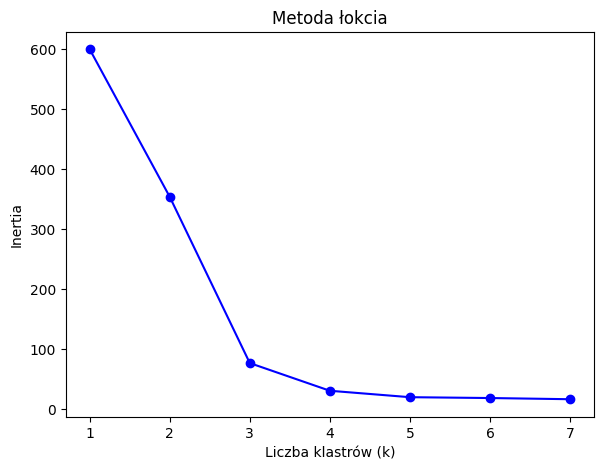

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(inertias) + 1), inertias, 'bo-')
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('Inertia')
plt.title('Metoda łokcia')

# Jak używać HuggingFace

### Przykładowy dataset: https://huggingface.co/datasets/HuggingFaceH4/MATH-500?library=datasets

In [ ]:
! pip install datasets

In [ ]:
from datasets import load_dataset

ds = load_dataset("HuggingFaceH4/MATH-500")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/412 [00:00<?, ?B/s]

test.jsonl:   0%|          | 0.00/447k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/500 [00:00<?, ? examples/s]

In [ ]:
ds


DatasetDict({
    test: Dataset({
        features: ['problem', 'solution', 'answer', 'subject', 'level', 'unique_id'],
        num_rows: 500
    })
})

In [ ]:
ds.keys()

dict_keys(['test'])

In [ ]:
ds_test = ds.get('test')

In [ ]:
type(ds_test['problem'])

list

In [ ]:
import pandas as pd

df = pd.read_json("hf://datasets/HuggingFaceH4/MATH-500/test.jsonl", lines=True)

In [ ]:
df

problem  \
0    Convert the point $(0,3)$ in rectangular coord...   
1    Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...   
2    If $f(x) = \frac{3x-2}{x-2}$, what is the valu...   
3    How many positive whole-number divisors does 1...   
4    The results of a cross-country team's training...   
..                                                 ...   
495  What is the domain of the function $f(x) = \fr...   
496  Let $z = 1+i$ and $w = \dfrac{3z+1}{5z+7}$. Fi...   
497  An equiangular octagon has four sides of lengt...   
498  A sequence $(a_n)$ is defined as follows:\n\[a...   
499  Altitudes $\overline{AD}$ and $\overline{BE}$ ...   

                                              solution  \
0    We have that $r = \sqrt{0^2 + 3^2} = 3.$  Also...   
1    We count the number of times $\frac{1}{n^3}$ a...   
2    $f(-2)+f(-1)+f(0)=\frac{3(-2)-2}{-2-2}+\frac{3...   
3    First prime factorize $196=2^2\cdot7^2$.  The ...   
4    Evelyn covered more distance in less time than...   
..                                                 ...   
495  The inner logarithm is only defined if $x - 2 ...   
496  Plugging in, we have $w = \dfrac{3(1+i)+1}{5(1...   
497  The octagon can be partitioned into five squar...   
498  First, if $a_3 = a_1,$ then\n\[a_1 = a_3 = a_5...   
499  First, we build a diagram:\n\n[asy]\n\nsize(15...   

                              answer               subject  level  \
0    \left( 3, \frac{\pi}{2} \right)           Precalculus      2   
1                              p - q  Intermediate Algebra      5   
2                       \frac{14}{3}               Algebra      3   
3                                  9         Number Theory      3   
4                      \text{Evelyn}               Algebra      2   
..                               ...                   ...    ...   
495             (2,12) \cup (12,102)  Intermediate Algebra      4   
496                     \frac{5}{13}  Intermediate Algebra      3   
497                      \frac{7}{2}              Geometry      5   
498                               -1  Intermediate Algebra      5   
499                        106^\circ              Geometry      4   

                               unique_id  
0              test/precalculus/807.json  
1    test/intermediate_algebra/1994.json  
2                 test/algebra/2584.json  
3            test/number_theory/572.json  
4                 test/algebra/1349.json  
..                                   ...  
495  test/intermediate_algebra/1981.json  
496  test/intermediate_algebra/1232.json  
497               test/geometry/561.json  
498  test/intermediate_algebra/1508.json  
499               test/geometry/615.json  

[500 rows x 6 columns]

# Podstawy pakietu Keras

In [ ]:
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
X_train[50]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12,  56, 140,
        126, 175, 200,  96,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  35, 166, 238, 254, 246,
        242, 253, 246, 254,  67,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 182, 146, 127,  70,
         30,  45,  36, 215, 175,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,   0,   0,   0,   0,
          0,   0,   0, 207, 246,  14,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  55, 251, 169,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  11, 215, 232,  20,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         20, 190, 250,  61,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 118,
        206, 254, 248, 142, 108,  18,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  63, 223, 254,
        254, 254, 254, 254, 254, 209,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  52, 174, 129,
         95,  16,  16,  16, 106, 249, 125,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 179, 239,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  80, 239,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  80, 244,  20,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 100, 239,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 234, 239,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   4, 140,   5,   0,   0,   0,
          0,   0,   0,   3, 150, 254, 129,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  64, 254, 181,  38,   0,   0,
          0,   0,  34, 188, 254, 209,  20,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  12, 226, 255, 223,  88,  68,
        128, 157, 242, 254, 207,  23,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  45, 210, 254, 254, 254,
        254, 255, 254, 187,  49,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  41, 129, 239, 229,
        179,  91,  16,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
np.unique(X_train[50])

array([  0,   1,   2,   3,   4,   5,  11,  12,  14,  16,  18,  20,  23,
        24,  30,  34,  35,  36,  38,  41,  45,  49,  52,  55,  56,  61,
        63,  64,  67,  68,  70,  80,  88,  91,  95,  96, 100, 106, 108,
       118, 125, 126, 127, 128, 129, 140, 142, 146, 150, 157, 166, 169,
       174, 175, 179, 181, 182, 184, 187, 188, 190, 200, 206, 207, 209,
       210, 215, 223, 226, 229, 232, 234, 238, 239, 242, 244, 246, 248,
       249, 250, 251, 253, 254, 255], dtype=uint8)

In [ ]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[50]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

# Tworzenie sieci
### 1. Utworzenie architektury sieci
### 2. Inicjalizacja sieci
### 3. Trening

In [ ]:
model = Sequential(
    [
        Flatten(input_shape = (28,28)),
        Dense(512, activation = 'relu'),
        Dense(256, activation = 'sigmoid'),
        Dense(32, activation = 'tanh'),
        Dense(10, activation = 'softmax')
    ]
)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 541,802 (2.07 MB)

 Trainable params: 541,802 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'categorical_crossentropy', metrics=['accuracy','recall','precision', 'f1_score'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_split = 0.2)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.6673 - f1_score: 0.6517 - loss: 1.1666 - precision: 0.9105 - recall: 0.3988 - val_accuracy: 0.9181 - val_f1_score: 0.9173 - val_loss: 0.3152 - val_precision: 0.9530 - val_recall: 0.8841
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9160 - f1_score: 0.9146 - loss: 0.3066 - precision: 0.9451 - recall: 0.8869 - val_accuracy: 0.9377 - val_f1_score: 0.9376 - val_loss: 0.2162 - val_precision: 0.9543 - val_recall: 0.9233
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9427 - f1_score: 0.9423 - loss: 0.1961 - precision: 0.9580 - recall: 0.9292 - val_accuracy: 0.9578 - val_f1_score: 0.9574 - val_loss: 0.1496 - val_precision: 0.9676 - val_recall: 0.9483
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9586 - f1_score: 0.9581 - loss: 0.1419 - precision: 0.9688 - recall: 0.9499 - val_accuracy: 0.9598 - val_f1_score: 0.9595 - val_loss: 0.1360 - val_precision: 0.9677 - val_recall: 0.9515

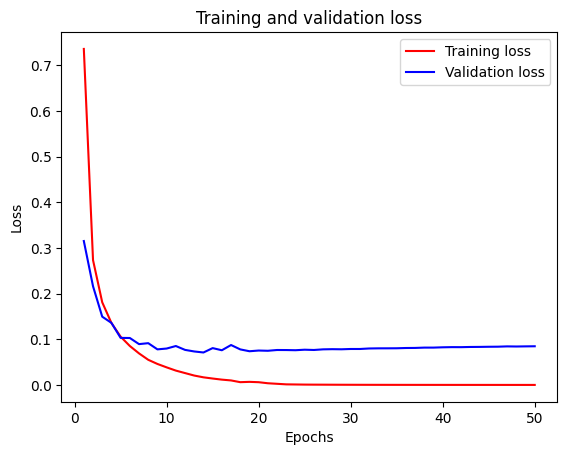

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
len(history_dict['loss'])

50

In [ ]:
len(history_dict['f1_score'])

50

In [ ]:
y_pred = model.predict(X_test)



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
y_pred[0]

array([1.3170751e-08, 1.5086746e-07, 2.0533672e-07, 8.7535625e-07,
       1.5132727e-07, 9.8012531e-09, 9.4050484e-13, 9.9999833e-01,
       8.7870928e-09, 2.3792414e-07], dtype=float32)

In [ ]:
a = np.argmax(y_pred, axis = 1)

In [ ]:
y_pred = model.predict(X_test)

a = np.argmax(y_pred, axis = 1)
b = np.argmax(y_test, axis = 1)

In [ ]:
b = np.argmax(y_test, axis = 1)

In [ ]:
print(f1_score(a,b, average = 'micro'))

0.9833


In [ ]:
print(f1_score(a,b, average = 'macro'))

0.9831857046295722


# Programowanie Obiektowe w Pythonie

### **klasa** - szablon, który definiuje obiekt/typ który chcemy stworzyć
### **atrybut** - zmienne w klasie - cechy tego obiektu
### **metody** - funkcje w klasie - zachowania tego obiektu
### **konstruktor** - specjalna metoda definiująca tworzenie obiektu
### **instancja** - realizacja klasy w zmiennej

In [ ]:
class Animal():   ### klasa

  def __init__(self, name_input, age_input, species_input):
    self.name = name_input ### atrybuty
    self.age = age_input
    self.species = species_input

  def bark(self, czy_tresowany_kot = False): ### metoda, która jeżeli .species == 'Dog' to wyprintuje 'hau' i zwróci True, jeżeli nie, to wyprintuje cokolwiek i zwróci False
    if self.species == "dog":
      print("hau hau")
      return True
    elif self.species == 'cat' and czy_tresowany_kot:
      print("hau hau jestem kotkiem")
      return True
    print("cokolwiek")

      # return True if self.species =="dog" else False <= tak też można

# Zadanie:
### Napisz klasę Car, która będzie miała atrybuty - wiek, przebieg, marka
### oraz metodę .pricing() dla auta, która domyslnie zwróci 100000, ale za każdy rok odejmie tysiąc,
### za każdy km przebiegu odejmie 1zl i poinformuje użytkownika o marce auta i jego wartości
### Daj użytkownikowi możliwość własnoręcznego ustawianie domyślnej ceny auta, tak, aby 100000 bylo domyslna wartoscia gdy uzytkownik nie poda swojej

### Przykład
### car = Car(15, 20000, 'Citroen')
### car.pricing() -> Citroen warty 65000


In [ ]:
from datetime import datetime

class Car():

    default_value = 100000

    def __init__(self, production_year: int, mileage:int, brand: str):
        self.production_year = production_year
        self.mileage = mileage
        self.brand = brand
        self.value = self.default_value

        # wiek auto
        current_year = datetime.now().year
        self.age = current_year - production_year

    def car_crash(self, degree_of_damage: float):
        self.value *= (1-degree_of_damage)
        return self.value

    def pricing(self):
        self.value= self.default_value - 1000*self.age - self.mileage
        return self.value

opel = Car(2024, 999, 'Opel')
opel.pricing()

98001

# Dziedziczenie

In [ ]:
class Animal():

  def __init__(self, name_input, age_input, species_input, is_herbivore):
    self.name = name_input
    self.age = age_input
    self.species = species_input
    self.is_herbivore = is_herbivore

  def make_sound(self, sound: str):
    return f"Zwierze robi {sound}"

  def make_sound(self, a,b):
    return ile_razy_hauhau*'hau'

In [ ]:
class Cat(Animal):

  def __init__(self, name, age, is_purring):
    super().__init__(name, age, 'cat', False)
    self.is_purring = is_purring

  def make_sound(self):
    super().make_sound(sound = 'meowwwwwwwww uwu :3')

In [ ]:
miska = Cat('Miska',3, 'tak sobie')

In [ ]:
miska.make_sound()

TypeError: Animal.make_sound() got an unexpected keyword argument 'sound'

# Zadanie:
### **1.** Zaimplementuj klasę Rectangle (czyli prostokąt) z atrybutami długość i szerokość
### oraz metodami: pole, obwód i długość przekątnej
### HINT - twierdzenie pitagorasa
### wypróbuj swoją klasę - stwórz prostokąt, policz jego pole i obwod

### **2.** a) Stwórz też klasę Square (kwadrat) która odziedziczy po Rectangle
### (*) b) Nadpisz sprytnie liczenie przekątnej

In [ ]:
import math

class Rectangle():
    def __init__(self, length, width):
        self.length = length
        self.width = width

    def area(self):
        return self.length * self.width

    def perimeter(self):
        return 2 * (self.length + self.width)

    def diagonal(self):
        return math.sqrt(self.length**2 + self.width**2)

class Square(Rectangle):
    def __init__(self, side):
        super().__init__(side, side)

    def diagonal(self):
        return self.length * math.sqrt(2)


# Metody statyczne, klasowe i instancji

### statyczna => nic
### instancji => self
### klasowa => cls

In [ ]:
from abc import ABC, abstractmethod

In [ ]:
class Pizza(ABC):

  def __init__(self, ingredients, radius=30):
    self.ingredients = ingredients
    self.radius = radius
    self.is_baked = False

  @abstractmethod ### metoda abstrakcyjna
  def bake_your_pizza(self, temperature, time):
    pass

  def say_i_love_pizza():
    print('I Love Pizza!')

  @classmethod
  def margherita(cls):
    return cls(['mozzarella','tomatoes'])

  @classmethod
  def veggie(cls):
    return cls(['tomatoes', 'mozzarella','mushrooms','soy sprouts', 'bamboo shoots'])



In [ ]:
class Calzone(Pizza):
  def __init__(self, ingredients, radius=20):
     super().__init__(ingredients, radius)

  def bake_your_pizza(self):
    print('mmm upieczona pitcunia')

In [ ]:
a = Calzone(['ham'])

In [ ]:
x = Pizza.margherita()

In [ ]:
x.ingredients

['mozzarella', 'tomatoes']

# Przeciążanie operatorów

In [ ]:
class Vector():

  def __init__(self, coords: list):
    self.coords = coords

  def __add__(self, v2):
    coord1 = self.coords
    coord2 = v2.coords

    assert len(coord1) == len(coord2), 'nie dodawaj wektorów o różnych długościach łosiu'

    coords_sum = [x+y for x,y in zip(coord1,coord2)]
    return Vector(coords_sum)

  def __len__(self):
    return len(self.coords)

  def __repr__(self):
    return str(self.coords)


#Zadanie:
### 1. Obsluż iloczyn skalarny wektorów (__matmul__)( @ )  i mnożenie przez liczbę wektorów (__mult__)( * )

  def __matmul__(self, v2):

    coord1 = self.coords
    coord2 = v2.coords
    assert len(coord1) == len(coord2)
    return sum(x * y for x, y in zip(coord1, coord2))


  def __mul__(self, scalar):
    if isinstance(scalar, (int, float)):
        return Vector([scalar * x for x in self.coords])
    else:
        raise ValueError("Achutng (int or float).")

  @classmethod
  def zero_vector(cls, n):
          return cls([0] * n)
### 2. Stwórz metodę klasową, która dla danej liczby n utworzy Vector zer o długości n


In [ ]:
v1 = Vector([1,2,3,3])
v2 = Vector([6,2,7,3])

In [ ]:
v1 @ v2

40

In [ ]:
v3 = Vector.zero_vector(5)
v3

[0, 0, 0, 0, 0]

In [ ]:
import numpy as np

np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])


#Sieć neuronowa w sklearn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report

from sklearn.neural_network import MLPClassifier

In [ ]:
wine_dataset = load_wine()

In [ ]:
### Zadanko:
# 1. Przygotuj dane
# 2. Stwórz, wytrenuj oraz zewaluuj model MLPClassifier
### HINT: Skorzystaj z dokumentacji sklearn.
### Sieć powinna mieć warstwy 256, 128, 64, 32
### oraz max 200 epok

In [ ]:
wine_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
X = wine_dataset['data']
y = wine_dataset['target']

In [ ]:
wine_dataset['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
type(wine_dataset['feature_names'])

list

In [ ]:
####### notatnik na slacku

# PODSTAWY COMPUTER VISION

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color

In [ ]:
img = data.cat()
img.shape

(300, 451, 3)

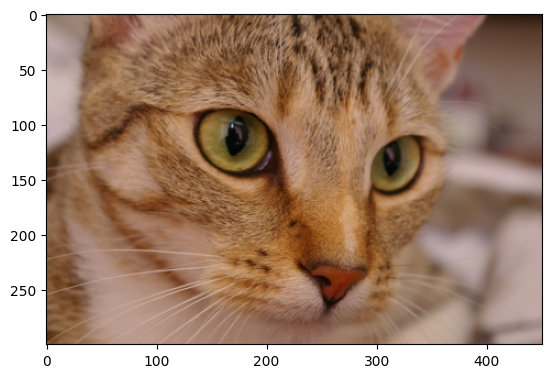

In [ ]:
plt.imshow(img)

plt.show()

In [ ]:
gray_cat = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

### my to rozumiemy jako KOLOR=>SZAROSC

### realnie jest to channels=3 -> channels=1

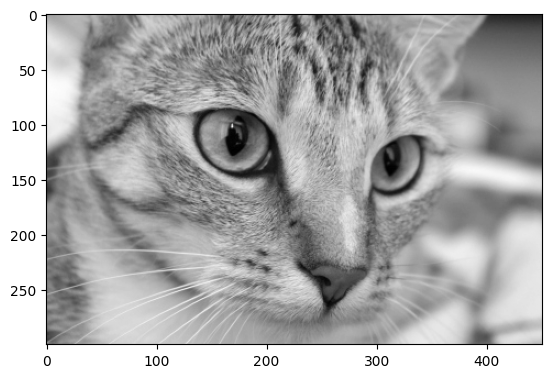

In [ ]:

plt.imshow(gray_cat, cmap='gray')
plt.show()

In [ ]:
new_cat = cv2.cvtColor(gray_cat, cv2.COLOR_GRAY2RGB)

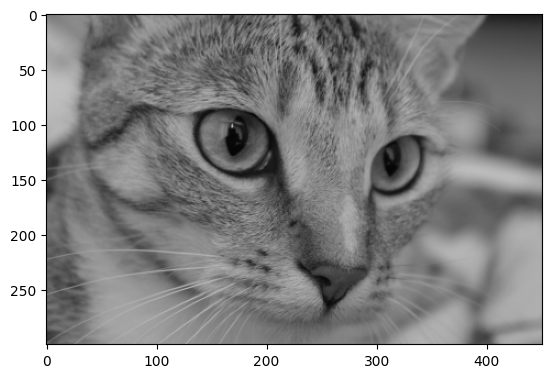

In [ ]:
plt.imshow(new_cat)
plt.show()

In [ ]:
new_cat.shape

(300, 451, 3)

### Test filtrów konwolucyjnych (kerneli)


In [ ]:
### Zadanie:
# Napisz funkkcję apply_kernel, która:
# - przyjmie jako argumenty zdjęcie oraz kernel (3,3)
# - użyje cv2 aby nałożyć ten kernel na zdjęcie
# - zwróci wynik tej konwolucji

## - dodatkowo: plusik za obsłużenie domyślnego kernela jako
##    kernela z jedynką w środku i zerami wszędzie poza

In [ ]:
import cv2
import numpy as np

basic_kernel = np.array([[0, 0, 0],
                           [0, 1, 0],
                           [0, 0, 0]])

def apply_kernel(img, kernel=basic_kernel):
    processed_image = cv2.filter2D(img, -1, kernel)
    return processed_image


array([[[143, 120, 104],
        [143, 120, 104],
        [141, 118, 102],
        ...,
        [ 45,  27,  13],
        [ 45,  27,  13],
        [ 45,  27,  13]],

       [[146, 123, 107],
        [145, 122, 106],
        [143, 120, 104],
        ...,
        [ 46,  29,  13],
        [ 45,  29,  13],
        [ 47,  30,  14]],

       [[148, 126, 112],
        [147, 125, 111],
        [146, 122, 109],
        ...,
        [ 48,  28,  17],
        [ 49,  29,  18],
        [ 50,  30,  19]],

       ...,

       [[ 92,  58,  30],
        [105,  71,  43],
        [132,  98,  71],
        ...,
        [172, 145, 138],
        [172, 145, 138],
        [172, 145, 138]],

       [[128,  92,  60],
        [139, 103,  71],
        [134,  95,  64],
        ...,
        [166, 142, 132],
        [166, 142, 132],
        [167, 143, 133]],

       [[139, 103,  71],
        [127,  88,  57],
        [125,  86,  53],
        ...,
        [161, 137, 127],
        [161, 137, 127],
        [162, 138, 128]]], dtype=uint8)
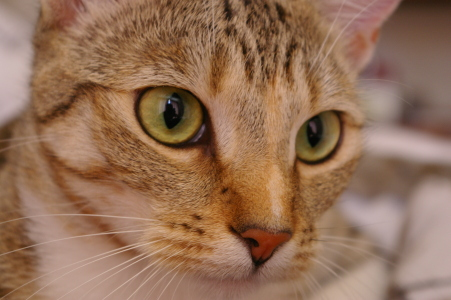

In [ ]:
apply_kernel(img)

In [ ]:
def apply_blur(img, n_times):

  blur_kernel =  np.array([
      [1,1,1],
      [1, -7 ,1],
      [1, 1, 1]
  ])

  for _ in range(n_times):
    img = cv2.filter2D(img, -1, blur_kernel)
  return img

array([[[157, 134, 118],
        [151, 128, 112],
        [157, 134, 118],
        ...,
        [ 58,  40,  19],
        [ 51,  41,  15],
        [ 49,  41,  15]],

       [[139, 119, 109],
        [142, 120, 111],
        [149, 125, 117],
        ...,
        [ 56,  23,  28],
        [ 60,  24,  29],
        [ 44,  17,  22]],

       [[143, 118, 101],
        [146, 119, 103],
        [143, 130, 107],
        ...,
        [ 48,  43,  15],
        [ 42,  38,  13],
        [ 35,  32,   9]],

       ...,

       [[201, 173, 139],
        [127,  96,  66],
        [  0,   0,   0],
        ...,
        [156, 149, 143],
        [157, 151, 138],
        [157, 151, 138]],

       [[ 77,  41,  23],
        [  9,   0,   0],
        [ 62,  37,  16],
        ...,
        [168, 133, 138],
        [171, 138, 137],
        [163, 130, 129]],

       [[ 93,  51,  21],
        [177, 153, 115],
        [162, 127, 109],
        ...,
        [192, 163, 160],
        [194, 170, 160],
        [186, 162, 152]]], dtype=uint8)
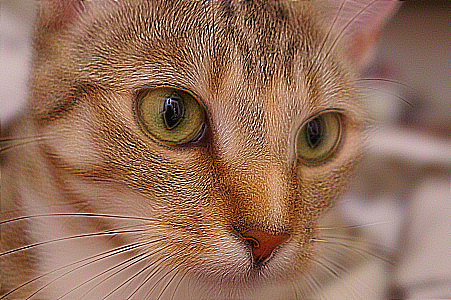

In [ ]:
apply_blur(img,1)

### Zadanie:
### Napisz CNN, który będzie zawierał:

*   konwolucję zwracającą 4 kanały (z paddingiem = 2)
*   maxpool (14x14x4)
*   konwolucję zwrającą 8 kanałów  (z paddingiem = 2)
*   maxpool (7x7x8)

<!-- ewentualnie dodaj: -->
<!-- *   konwolucję zwrającą 18 kanałów  (z paddingiem = 2)
*   maxpool (4x4x16) -->

### Dokończ klasyczną siecią MLP.

### Użyj tej sieci w klasyfikacji zbioru MNIST (sciagnij i przygotuj dane, stworz model, uzyj compile, fit, nastepnie ocen jakosc predykcji)

In [ ]:
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000,28,28,1)

X_test = X_test.reshape(10000,28,28,1)


X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
X_train[1].shape

(28, 28, 1)

In [ ]:
model = Sequential(
    [
        Input(shape=X_train[1].shape),
        Conv2D(4, kernel_size=(3, 3), padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(8, kernel_size=(3, 3), padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy', ### po prostu log_loss
    metrics = ['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    batch_size = 512,
    epochs = 10
)

NameError: name 'model' is not defined

In [ ]:
Wscore = model.evaluate(X_test,y_test)
print('loss:',score[0],'acc:',score[1])

### CNN - zadanie 2

https://keras.io/api/datasets/cifar10/

In [ ]:
# 1. Pobierz dataset CIFAR10 i przeanalizuj go

In [ ]:
from keras.datasets import cifar10
from keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

 (X_train, y_train), (X_test, y_test) = cifar10.load_data()



In [ ]:
X_train.shape #### 50tys probek, kazda rozmiaru 32x32, kolorowe (bo 3 channele)

(50000, 32, 32, 3)

In [ ]:
# 0	airplane
# 1	automobile
# 2	bird
# 3	cat
# 4	deer
# 5	dog
# 6	frog
# 7	horse
# 8	ship
# 9	truck

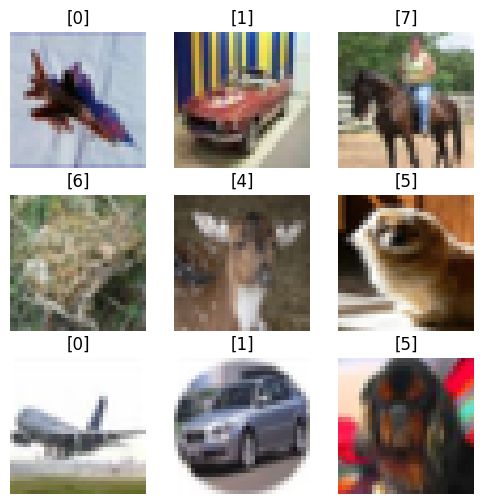

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (6, 6))
axes = axes.flatten()
idxs = np.random.choice(a=range(len(X_train)), size=len(axes))
for idx, axis in zip(idxs, axes):
  image = X_train[idx]
  axis.set_axis_off()
  axis.imshow(image)
  axis.set_title(str(y_train[idx]))
plt.show()


In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
32 *32*3

3072

In [ ]:
model2 = Sequential(
    [
        Flatten(input_shape=(32,32,3)),
        Dense(1024, activation = 'relu'),
        Dense(512, activation = 'relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='tanh'),
        Dropout(0.3),
        Dense(10, activation = 'softmax')
    ]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,837,066 (14.64 MB)

 Trainable params: 3,837,066 (14.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy', ### po prostu log_loss
    metrics = ['f1_score']
)
history = model2.fit(
    X_train,
    y_train,
    batch_size = 1024,
    epochs = 60,
    validation_split = 0.2
)

Epoch 1/60


KeyboardInterrupt: 

In [ ]:
|
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

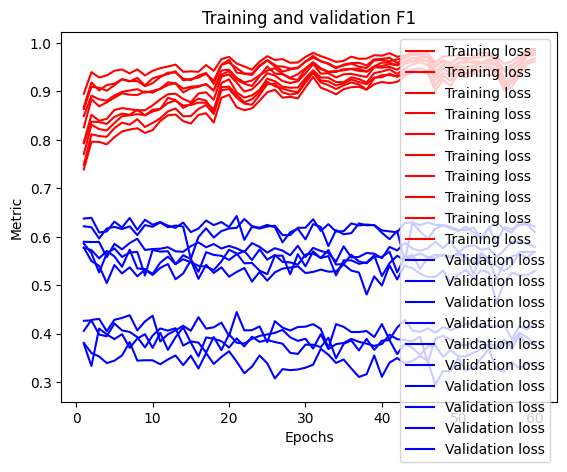

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['f1_score']
val_loss_values = history_dict['val_f1_score']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation F1')
plt.xlabel('Epochs')
plt.ylabel('Metric')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(X_test,y_test,verbose = 3)
print("Test loss:", score[0])
print("Test F1:", score[1])

Test loss: 3.626889944076538
Test F1: tf.Tensor(
[0.57707906 0.61127305 0.37932867 0.3411595  0.42154315 0.41365653
 0.5498707  0.55650514 0.59329605 0.55690503], shape=(10,), dtype=float32)


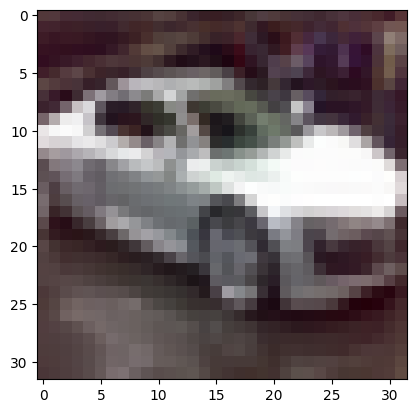

In [ ]:
X_train[432]
plt.imshow(X_train[432].)
plt.show()

In [ ]:
np.argmax(model.predict(X_train[432].reshape(1,32,32,3)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


1

In [ ]:
### Zastosuj kod Kamila ze slacka aby porządnie przeanalizować rezultaty

### Możesz też wytrenować CNN i porównać

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
y_pred_probs = model2.predict(X_test)  # Get softmax probabilities
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


<ipython-input-35-263baa51ea2b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=correct_classification_probs, palette="Greens")


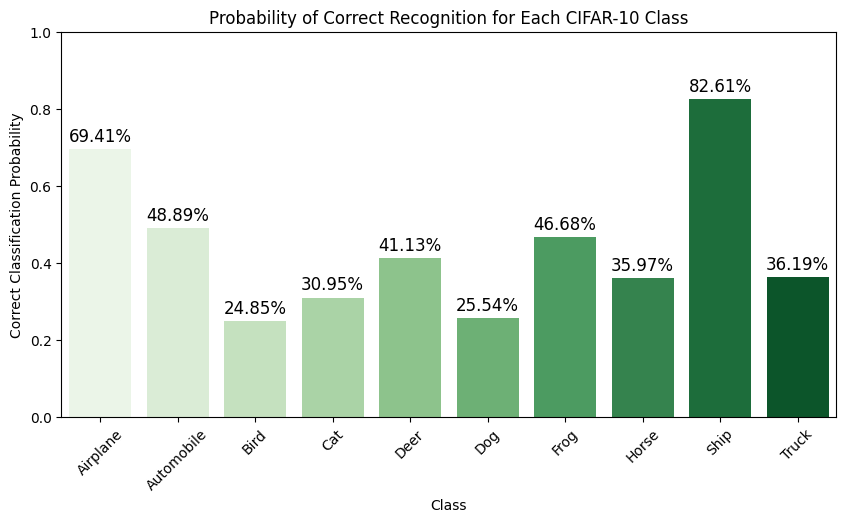

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 🔹 Get model predictions
y_pred_probs = model2.predict(X_test)  # Get softmax probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels

# 🔹 Compute confusion matrix
cm = confusion_matrix(y_pred, np.argmax(y_test,axis=1))

# 🔹 Compute correct classification probabilities
correctly_classified_counts = np.diag(cm)  # Correct predictions (diagonal of CM)
total_counts = np.sum(cm, axis=1)  # Total instances per class
correct_classification_probs = correctly_classified_counts / total_counts  # P(correct | class)
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
# 🔹 Plot correct classification probability per class
plt.figure(figsize=(10, 5))
sns.barplot(x=class_names, y=correct_classification_probs, palette="Greens")
plt.xlabel("Class")
plt.ylabel("Correct Classification Probability")
plt.title("Probability of Correct Recognition for Each CIFAR-10 Class")
plt.ylim(0, 1)

# 🔹 Show probability values above bars
for i, v in enumerate(correct_classification_probs):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center', fontsize=12)

plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

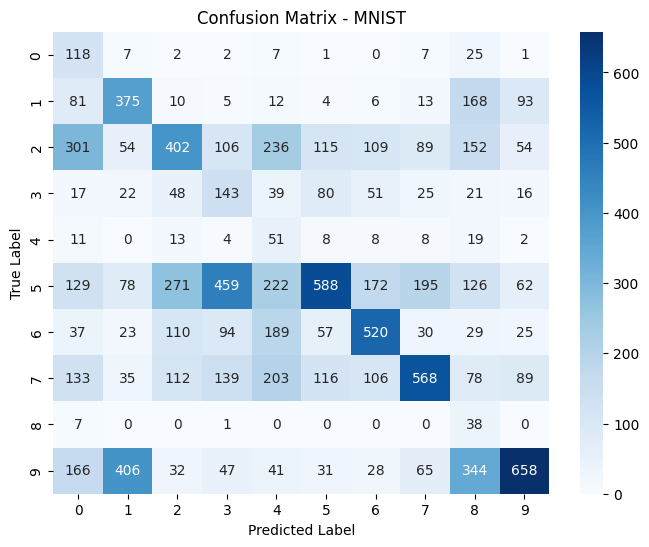

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - MNIST")
plt.show()

In [ ]:
# Zadanie: Napisz CNN dla tasku CIFAR10, porównaj jego działanie z MLP


###

## Mały przegląd technik obróbki zdjęć

In [ ]:
import imgaug.augmenters as ia
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt

In [ ]:
#### napisz kod który wyświetli astronautkę za pomocą skimage


array([[[154, 147, 151],
        [109, 103, 124],
        [ 63,  58, 102],
        ...,
        [127, 120, 115],
        [120, 117, 106],
        [125, 119, 110]],

       [[177, 171, 171],
        [144, 141, 143],
        [113, 114, 124],
        ...,
        [127, 118, 112],
        [124, 115, 108],
        [121, 116, 105]],

       [[201, 194, 193],
        [182, 178, 175],
        [168, 165, 164],
        ...,
        [128, 120, 117],
        [126, 116, 112],
        [124, 114, 109]],

       ...,

       [[186, 170, 176],
        [186, 170, 177],
        [183, 168, 170],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]],

       [[183, 169, 170],
        [182, 167, 171],
        [185, 164, 176],
        ...,
        [  0,   0,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[184, 167, 172],
        [183, 165, 169],
        [180, 162, 171],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]]], dtype=uint8)
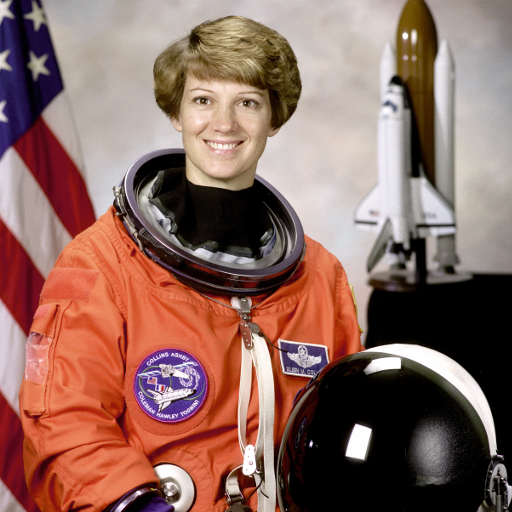

In [ ]:
img = data.astronaut()
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
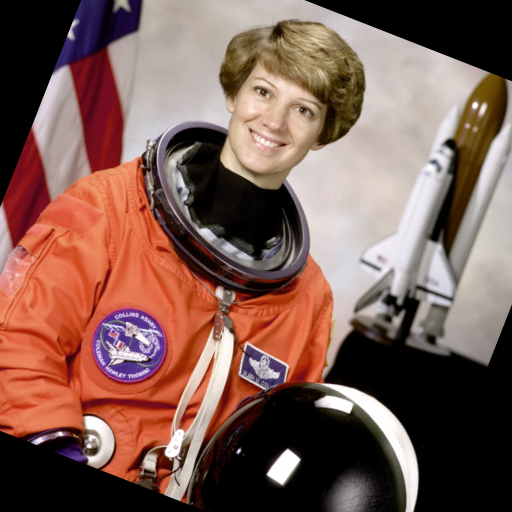

In [ ]:
rotation = ia.Rotate((-45,45), seed=42)
rot_img = rotation(image = img)
rot_img

array([[[179, 172, 176],
        [117, 111, 132],
        [ 82,  77, 121],
        ...,
        [ 85,  78,  73],
        [110, 107,  96],
        [139, 133, 124]],

       [[200, 194, 194],
        [141, 138, 140],
        [140, 141, 151],
        ...,
        [112, 103,  97],
        [122, 113, 106],
        [101,  96,  85]],

       [[172, 165, 164],
        [178, 174, 171],
        [143, 140, 139],
        ...,
        [140, 132, 129],
        [141, 131, 127],
        [107,  97,  92]],

       ...,

       [[226, 210, 216],
        [153, 137, 144],
        [192, 177, 179],
        ...,
        [ 12,  12,  12],
        [ 43,  43,  44],
        [  0,   0,   0]],

       [[193, 179, 180],
        [158, 143, 147],
        [224, 203, 215],
        ...,
        [  9,   9,  10],
        [  0,   0,   0],
        [  2,   2,   2]],

       [[151, 134, 139],
        [220, 202, 206],
        [134, 116, 125],
        ...,
        [ 42,  42,  42],
        [ 14,  14,  14],
        [ 25,  25,  25]]], dtype=uint8)
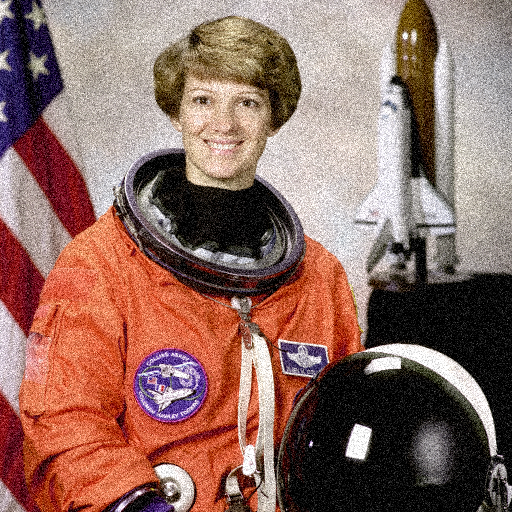

In [ ]:
noise = ia.AdditiveGaussianNoise(scale=0.1*255, seed=42)
noise(image=img)

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [93, 91, 84],
        [39, 36, 30],
        [69, 62, 62]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [79, 78, 69],
        [55, 49, 46],
        [97, 91, 86]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [86, 83, 76],
        [48, 45, 38],
        [90, 89, 82]]], dtype=uint8)
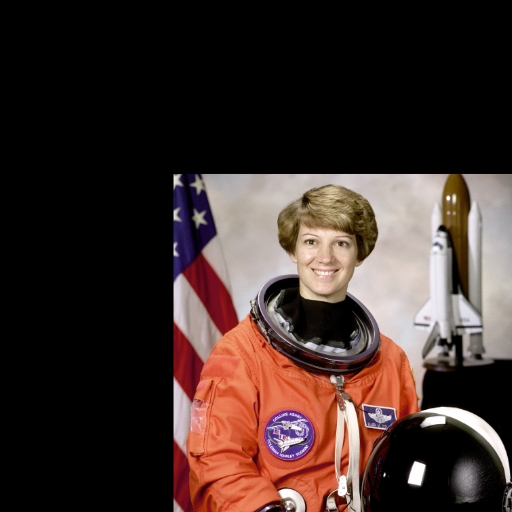

In [ ]:
scale = ia.Affine(scale=(0.5, 1.5),translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)})
img_scaled = scale(image = img)
img_scaled


array([[[154, 147, 151],
        [100, 100, 100],
        [ 63,  58, 102],
        ...,
        [ 24,  24,  24],
        [238, 238, 238],
        [125, 119, 110]],

       [[177, 171, 171],
        [144, 141, 143],
        [113, 114, 124],
        ...,
        [ 16,  16,  16],
        [124, 115, 108],
        [ 52,  52,  52]],

       [[109, 109, 109],
        [182, 178, 175],
        [244, 244, 244],
        ...,
        [249, 249, 249],
        [126, 116, 112],
        [124, 114, 109]],

       ...,

       [[186, 170, 176],
        [186, 170, 177],
        [183, 168, 170],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]],

       [[183, 169, 170],
        [ 21,  21,  21],
        [185, 164, 176],
        ...,
        [  0,   0,   1],
        [  1,   1,   1],
        [197, 197, 197]],

       [[184, 167, 172],
        [183, 165, 169],
        [180, 162, 171],
        ...,
        [251, 251, 251],
        [  1,   1,   1],
        [  0,   0,   0]]], dtype=uint8)
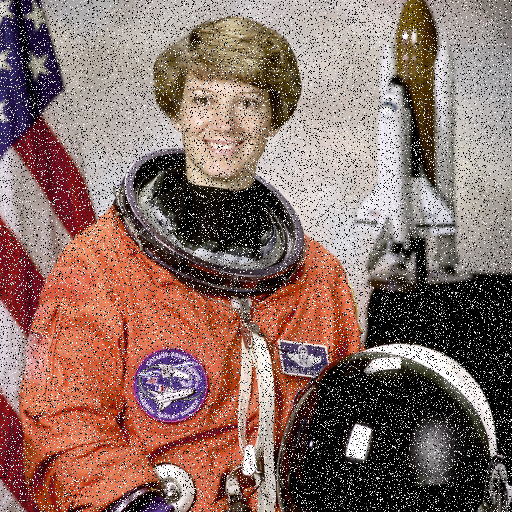

In [ ]:
salt_and_pepper = ia.SaltAndPepper(0.2)
salt_and_pepper(image=img)

In [ ]:
seq_aug = ia.Sequential([
    ia.Sometimes(0.5, ia.AdditiveGaussianNoise(scale=0.1*255)),
    ia.Sometimes(0.5, ia.Rotate((-45,45))),
    ia.Sometimes(0.5, ia.SaltAndPepper(0.2)),
])

array([[[224, 224, 224],
        [172, 166, 187],
        [247, 247, 247],
        ...,
        [125, 118, 113],
        [149, 146, 135],
        [114, 108,  99]],

       [[137, 131, 131],
        [111, 108, 110],
        [ 99, 100, 110],
        ...,
        [ 29,  29,  29],
        [139, 130, 123],
        [ 87,  82,  71]],

       [[213, 206, 205],
        [152, 148, 145],
        [155, 152, 151],
        ...,
        [133, 125, 122],
        [132, 122, 118],
        [134, 124, 119]],

       ...,

       [[233, 217, 223],
        [157, 141, 148],
        [156, 141, 143],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255]],

       [[207, 193, 194],
        [189, 174, 178],
        [155, 134, 146],
        ...,
        [ 37,  37,  37],
        [  0,   0,   0],
        [  3,   3,   3]],

       [[222, 205, 210],
        [221, 203, 207],
        [ 16,  16,  16],
        ...,
        [ 11,  11,  11],
        [  8,   8,   8],
        [  0,   0,   0]]], dtype=uint8)
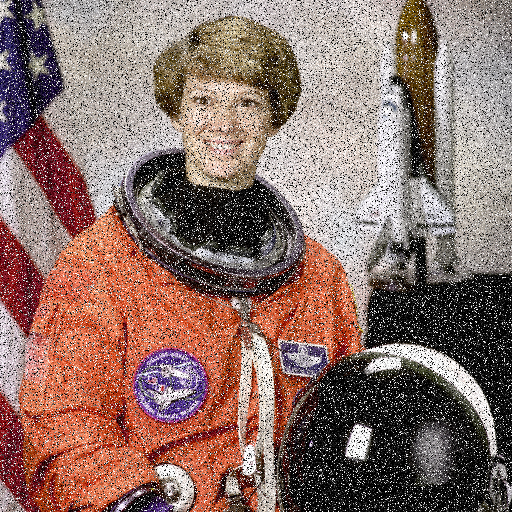

In [ ]:
seq_aug(image = img)

In [ ]:
from keras.datasets import cifar10
from keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator ### customowy zbior danych w ktorym zakodujemy jak
                                                        #### podczas treningu ma tworzyc nowe zaugmentowane dane

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
)

In [ ]:
train_datagen = train_datagen.flow(X_train, y_train , batch_size=256)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
model_aug = Sequential(
    [
        Flatten(input_shape=(32,32,3)),
        Dense(1024, activation = 'relu'),
        Dense(512, activation = 'relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='tanh'),
        Dropout(0.3),
        Dense(10, activation = 'softmax')
    ]
)

model_aug.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history_aug = model_aug.fit(train_datagen,
                    validation_data=(X_test,y_test),
                    epochs = 20,
                    steps_per_epoch = 300)

# zauważ, że daliśmy do parametru validation_data dane testowe.
#
# problem: NIE możemy użyć wzmaniania danych w zbiorze walidacyjnych
# powinniśmy przed augmentacją wydzielić osobno zbiory train, val, test

Epoch 1/20
196/300 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - accuracy: 0.0992 - loss: 0.3529

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


300/300 ━━━━━━━━━━━━━━━━━━━━ 38s 127ms/step - accuracy: 0.0994 - loss: 0.3518 - val_accuracy: 0.1000 - val_loss: 0.3264
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 32s 97ms/step - accuracy: 0.0995 - loss: 0.3415 - val_accuracy: 0.1000 - val_loss: 0.3259
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.1032 - loss: 0.3346 - val_accuracy: 0.1000 - val_loss: 0.3255
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 40s 133ms/step - accuracy: 0.1002 - loss: 0.3315 - val_accuracy: 0.1000 - val_loss: 0.3257
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 35s 112ms/step - accuracy: 0.0981 - loss: 0.3292 - val_accuracy: 0.1000 - val_loss: 0.3255
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 36s 97ms/step - accuracy: 0.1027 - loss: 0.3277 - val_accuracy: 0.1000 - val_loss: 0.3254
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.0983 - loss: 0.3272 - val_accuracy: 0.1000 - val_loss: 0.3259
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 42s 103ms/step - accuracy: 0.0983 - loss: 0.3268 - val_a

KeyboardInterrupt: 

# TRANSFER LEARNING / FINE TUNING


## Zadanie :

### a) Wykorzystaj gotowy model EfficientNet do własnego tasku
### b) Dotrenuj ten model z dołożoną warstwą na końcu na cifar100

In [ ]:
 # ZADANIE :

### a) Wykorzystaj gotowy model EfficientNet do własnego tasku
### b) Dotrenuj ten model z dołożoną warstwą na końcu na cifar100

In [ ]:
import keras
from keras.layers import Dense, Flatten, Input
from keras.models import Model
from keras.applications import EfficientNetB0 # trenowany na imagenet
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:

 (x_train, y_train), (x_test,y_test) = cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test,test_size = 0.5, random_state = 42)

In [ ]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

y_train = y_train.reshape(50000,1,1,100) ### robimy to bo efficientNet tak potrzebuje
y_val = y_val.reshape(5000,1,1,100)
y_test = y_test.reshape(5000,1,1,100)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(50000, 1, 1, 100)
(5000, 1, 1, 100)
(5000, 1, 1, 100)


In [ ]:
input = Input(shape=(32,32,3))

efficient_net = EfficientNetB0(include_top=False, input_shape = (32,32,3))(input)

output = Dense(100, activation='softmax')(efficient_net)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Model(input, output)

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy','AUC'])

In [ ]:
early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

model.fit(x_train,y_train, batch_size = 512, epochs = 300, callbacks=[early_stopping])

Epoch 1/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 97s 380ms/step - AUC: 0.7987 - accuracy: 0.2021 - loss: 3.5464
Epoch 2/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - AUC: 0.9667 - accuracy: 0.5380 - loss: 1.6735
Epoch 3/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - AUC: 0.9834 - accuracy: 0.6641 - loss: 1.1622
Epoch 4/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - AUC: 0.9919 - accuracy: 0.7579 - loss: 0.8148
Epoch 5/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - AUC: 0.9962 - accuracy: 0.8329 - loss: 0.5605
Epoch 6/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - AUC: 0.9980 - accuracy: 0.8824 - loss: 0.3958
Epoch 7/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - AUC: 0.9988 - accuracy: 0.9153 - loss: 0.2824
Epoch 8/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - AUC: 0.9991 - accuracy: 0.9341 - loss: 0.2190
Epoch 9/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - AUC: 0.9992 - accuracy: 0.9471 - loss: 0.1810
Epoch 10/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - AUC: 0.9994 - accuracy: 0.9558 - loss:

KeyboardInterrupt: 

In [ ]:
efficient_net.trainable = True
model.compile(loss = 'categorical_crossentropy', metrics = ['AUC','accuracy'])
model.fit(x_train,y_train, batch_size=32, epochs = 50, validation_split= 0.2)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 25ms/step - AUC: 0.9411 - accuracy: 0.5263 - loss: 1.8981 - val_AUC: 0.9296 - val_accuracy: 0.5170 - val_loss: 2.1191
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - AUC: 0.9511 - accuracy: 0.5154 - loss: 1.8511 - val_AUC: 0.9404 - val_accuracy: 0.5394 - val_loss: 1.9860
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - AUC: 0.9600 - accuracy: 0.5672 - loss: 1.6282 - val_AUC: 0.9341 - val_accuracy: 0.5344 - val_loss: 2.0327
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - AUC: 0.9660 - accuracy: 0.5987 - loss: 1.4903 - val_AUC: 0.9326 - val_accuracy: 0.5353 - val_loss: 2.0421
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - AUC: 0.9712 - accuracy: 0.6300 - loss: 1.3533 - val_AUC: 0.9357 - val_accuracy: 0.5474 - val_loss: 1.9711
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - AUC: 0.9745 - accuracy: 0.6586 - loss: 1.2314 - val_AUC: 0.9220 - val_accuracy: 0.5467 - val_loss: 2.1951
Epoch 7/50
1250

KeyboardInterrupt: 

### Podstawy PyTorcha

In [ ]:
### Zadanie 1

# a) Stwórz klasę BankAccount, która będzie reprezentować konto bankowe. Zdefiniuj w niej atrybuty
# 'owner' oraz 'balance, metody 'deposit', 'withdraw'. Przeciąż printa tak, aby pokazywał stan konta.

# b1) Stwórz podklasę PremiumAccount która będzie startować z 5000zł.
# b2**) Wykonaj powyższe przy pomocy metody klasowej zamiast dziedziczenia.

In [ ]:
class BankAccount:
    def __init__(self, owner, balance=0.0):
        self.owner = owner
        self.balance = balance
    def deposit(self, amount):
            self.balance += amount
            print(f"Wpłacono {amount:.2f} zł. Nowy stan konta: {self.balance:.2f} zł")
    def withdraw(self, amount):
        if  amount <= self.balance:
            self.balance -= amount
            print(f"Wypłacono {amount:.2f} zł. Nowy stan konta: {self.balance:.2f} zł")
        else:
            print(f"Not possible")
    def __str__(self):
              return f"Właściciel: {self.owner}\nStan konta: {self.balance:.2f} zł"
    def __repr__(self):
              return f" REPR MWłaściciel: {self.owner}\nStan konta: {self.balance:.2f} zł"

    @classmethod
    def make_premium(cls, owner, balance):
      return cls(owner, 5000+balance)



class PremiumAccount(BankAccount):
    def __init__(self, owner, balance=0.0):
      super().__init__(owner, balance + 5000)


class PremiumAccount:
    def __init__(self, owner, initial_balance=5000.0):
        self.account = BankAccount(owner, balance=initial_balance)
    def deposit(self, amount):
        self.account.deposit(amount)
    def withdraw(self, amount):
        self.account.withdraw(amount)
    def __str__(self):
        return str(self.account)

In [ ]:
emilia_acc = BankAccount.make_premium('Emilia', 10000)


In [ ]:
print(emilia_acc)

Właściciel: Emilia
Stan konta: 15000.00 zł


In [ ]:
emilia_acc

 REPR MWłaściciel: Emilia
Stan konta: 15000.00 zł

# Podstawy PyTorcha

# -  będziemy używać specjalnego obiektu do obsługi danych DataLoader

# - sami będziemy implementowali forward_pass czyli w jaki sposób dane przechodzą przez sieć

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as opt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

from sklearn.metrics import  confusion_matrix, roc_curve, auc

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [ ]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [ ]:
### Jak encodować dane


### numeryczne np. Fare

### kategoryczne:
###   ordynalne: PClass (LabelEncoder)
###   nominalne: Sex (OneHotEncoder)

In [ ]:
### Zadanie: Wykonaj małą EDA - wyrzucenie zbędnych kolumn, przeskalowanie danych, encoding, moze jakas korelacja

### Dorzuć zmienną AgeType - 0-13 => 0 (child) 13-18 => 1 (teen) 18-60 (adult) 60+ (elder)



In [ ]:
df['Alone'] = np.where((df['SibSp'] == 0) & (df['Parch'] == 0), 0, 1)

In [ ]:
df.isna().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
Alone          0.000000
dtype: float64

In [ ]:
df.drop('Cabin', inplace = True , axis = 1)


In [ ]:
df.dropna(inplace = True)

In [ ]:
from operator import index
X = df.drop('Survived', axis = 1).reset_index(drop = True)
y = df['Survived'].reset_index(drop = True)



In [ ]:
encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(X[['Sex']])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Sex']))


In [ ]:
encoded_df

Sex_female  Sex_male
0           0.0       1.0
1           1.0       0.0
2           1.0       0.0
3           1.0       0.0
4           0.0       1.0
..          ...       ...
707         1.0       0.0
708         0.0       1.0
709         1.0       0.0
710         0.0       1.0
711         0.0       1.0

[712 rows x 2 columns]

In [ ]:
X = pd.concat([X, encoded_df], axis=1)
X = X.drop(['Sex','Name','Ticket','Embarked','PassengerId'], axis=1)

In [ ]:
X

Pclass   Age  SibSp  Parch     Fare  Alone  Sex_female  Sex_male
0         3  22.0      1      0   7.2500      1         0.0       1.0
1         1  38.0      1      0  71.2833      1         1.0       0.0
2         3  26.0      0      0   7.9250      0         1.0       0.0
3         1  35.0      1      0  53.1000      1         1.0       0.0
4         3  35.0      0      0   8.0500      0         0.0       1.0
..      ...   ...    ...    ...      ...    ...         ...       ...
707       3  39.0      0      5  29.1250      1         1.0       0.0
708       2  27.0      0      0  13.0000      0         0.0       1.0
709       1  19.0      0      0  30.0000      0         1.0       0.0
710       1  26.0      0      0  30.0000      0         0.0       1.0
711       3  32.0      0      0   7.7500      0         0.0       1.0

[712 rows x 8 columns]

In [ ]:
[3, 20.0, 0, 0, 8.05, 0, 0.0, 1.0]

[3, 20.0, 0, 0, 8.05, 0, 0.0, 1.0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
X_val = torch.from_numpy(X_val).float()

y_val = torch.from_numpy(y_val.values).float()
y_train = torch.from_numpy(y_train.values).float()
y_test = torch.from_numpy(y_test.values).float()

In [ ]:
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True)

val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size = 8, shuffle = True)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size = 8, shuffle = True)


In [ ]:
len(X_train[0])

8

In [ ]:
len(X_train[0])

8

In [ ]:
###

In [ ]:
class TitanicMLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(len(X_train[0]), 64) ### to samo co dense w keras
    ## w1,..., wn - wagi, x1,...,xn - dane, wynik = x1*w1 + ... + xn*wn + bias <= kombinacja liniowa
    self.fc2 = nn.Linear(64, 256)
    self.fc3 = nn.Linear(256, 64)
    self.fc4 = nn.Linear(64, 16)
    self.fc5 = nn.Linear(16, 1)

    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()
    self.drop = nn.Dropout(0.25)
  def forward(self, input):# definicja forward-pass czyli przejscia danych rpzez model
    x = self.relu(self.fc1(input))
    x = self.relu(self.fc2(x))
    x = self.relu(self.fc3(x))
    x = self.drop(self.relu(self.fc4(x)))
    x = self.sigmoid(self.fc5(x))
    return x

In [ ]:
model = TitanicMLP()
criterion = nn.BCELoss() ### log-loss
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
import logging
from time import time
from tqdm import tqdm

class TitanicLogger():

  def __init__(self, log_interval = 10):
    self.logger = logging.getLogger("my logger")
    self.log_interval = log_interval
    self.logger.setLevel(level = logging.DEBUG)


  def on_epoch_begin(self, epoch):
    self.epoch_start_time = time()
    self.logger.info(f"Epoch {epoch + 1} starting.")

  def on_epoch_end(self, epoch, logs):
    epoch_time = time() - self.epoch_start_time
    self.logger.info(f"Epoch {epoch + 1} finished in {epoch_time:.2f} seconds.")
    self.logger.info(f'Epoch {epoch+1}/{epochs}, Loss: {logs["current_epoch_loss"]}')

  def early_stopping(self, epoch, logs,
                     n_early_stop =3):
    if epoch > n_early_stop - 1: ## bo zaczynamy od 0
      idx = - n_early_stop
      if (logs['train_losses'][idx:] == np.sort(logs['train_losses'][idx:])).all():
        return True
      return False



In [ ]:
## napisz def train_model(model, epochs, n_early_stop = 0) która wytrenuje nasz model
## ponadto użyj naszego TrainerLoggera do informowania użytkownika o
## starcie epoki, czasie trwania epoki i potencjalnym early stoppingu

In [ ]:
c = 2

In [ ]:
logger = logging.getLogger(" ")
logger.setLevel(logging.DEBUG)
logger.info(c)

2
INFO: :2


In [ ]:
logger = TitanicLogger()

epochs = 1000
train_losses = []
n_early_stop = 20
# n_early_stop_params = model.parameters()
logs = {
      "val_losses": [],
      "train_losses" : [],
      'current_epoch_loss': 0
  }

for epoch in range(epochs):

  epoch_loss = 0

  logger.on_epoch_begin(epoch)

  for X_batch, y_batch in train_loader:
    optimizer.zero_grad() ## stwórz świeże miejsce na gradient
    output = model(X_batch) ###  forward_pass
    loss = criterion(torch.squeeze(output), y_batch) ### przeliczenie bledu
    loss.backward() ### obliczenie wszystkich gradientow
    optimizer.step() ### uzywa gradientow do aktualizacji wag
    epoch_loss += loss.item()

  val_epoch_loss = 0
  with torch.no_grad():
    for X_val_batch, y_val_batch in val_loader:
      val_output = model(X_val_batch)
      val_loss = criterion(torch.squeeze(val_output), y_val_batch)
      val_epoch_loss += val_loss


  logs['current_epoch_loss'] = epoch_loss
  ### if n_early_stop > 0:
    #   early_stopping(n_early_stop)

  logs['train_losses'].append(epoch_loss/len(train_loader))
  logs['val_losses'].append(val_epoch_loss/len(val_loader))

  logger.on_epoch_end(epoch, logs)

  if logger.early_stopping(epoch, logs, n_early_stop):
    logging.info(f"Last {n_early_stop} losses: {logs['train_losses'][-n_early_stop:]}, stopping train loop.")
    break



INFO:my logger:Epoch 1 starting.
INFO:my logger:Epoch 1 finished in 0.10 seconds.
INFO:my logger:Epoch 1/1000, Loss: 5.948190450668335
INFO:my logger:Epoch 2 starting.
INFO:my logger:Epoch 2 finished in 0.11 seconds.
INFO:my logger:Epoch 2/1000, Loss: 6.158447831869125
INFO:my logger:Epoch 3 starting.
INFO:my logger:Epoch 3 finished in 0.09 seconds.
INFO:my logger:Epoch 3/1000, Loss: 6.058672666549683
INFO:my logger:Epoch 4 starting.
INFO:my logger:Epoch 4 finished in 0.10 seconds.
INFO:my logger:Epoch 4/1000, Loss: 5.844686806201935
INFO:my logger:Epoch 5 starting.
INFO:my logger:Epoch 5 finished in 0.09 seconds.
INFO:my logger:Epoch 5/1000, Loss: 5.916842818260193
INFO:my logger:Epoch 6 starting.
INFO:my logger:Epoch 6 finished in 0.10 seconds.
INFO:my logger:Epoch 6/1000, Loss: 5.883180201053619
INFO:my logger:Epoch 7 starting.
INFO:my logger:Epoch 7 finished in 0.09 seconds.
INFO:my logger:Epoch 7/1000, Loss: 5.992052711546421
INFO:my logger:Epoch 8 starting.
INFO:my logger:Epoch 8

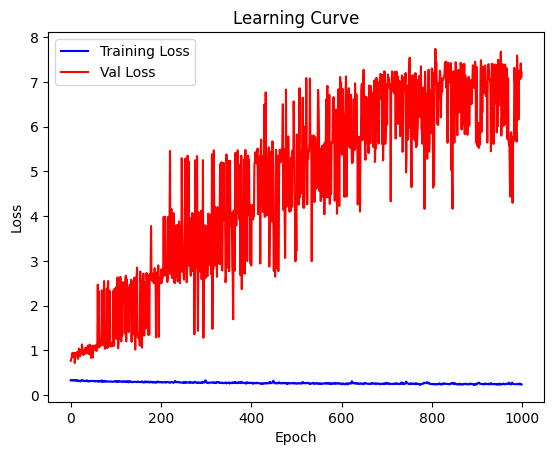

In [ ]:
plt.plot(logs['train_losses'], '-b', label='Training Loss',)
with torch.no_grad():
  plt.plot(logs['val_losses'], '-r', label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [ ]:
model(X_test[0])

tensor([1.], grad_fn=<SigmoidBackward0>)

In [ ]:
X_test[0]

tensor([0.0000, 0.6475, 0.2500, 0.0000, 0.1068, 1.0000, 0.0000, 1.0000])

In [ ]:
row = np.array([1, 20.0, 0, 0, 150.00, 0, 1.0, 0.0]).reshape(1, -1)
row = torch.from_numpy(scaler.transform(row)).float()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
[0.02, 0.98]
model(row)

tensor([[1.0000]], grad_fn=<SigmoidBackward0>)

In [ ]:
# na jutro:
## kwargs/args
## cross validacja => hyperparameters tuning
## dotknac tensorflowa

## obmyslec projekt


# Klasyfikacja dla zbioru FashionMNIST

In [ ]:
import torch
import torch.nn as nn
import torch.optim as opt
import torch.utils.data as dt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from torchvision import datasets, transforms

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
  ### tutaj można wrzucić znacznie więcej https://pytorch.org/vision/0.9/transforms.html
])

In [ ]:

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot


TypeError: MNIST.__init__() missing 1 required positional argument: 'root'

In [ ]:
torch.max(train_dataset[0][0])


### train_dataset - zbior danych caly
### train_dataset[0] - pierwsza probka (X,y)


tensor(1.)

In [ ]:
### wyświetl przykładowy obrazek, sprawdź czy jest czarno-biały czy też kolorowy

In [ ]:
first_image, first_label = train_dataset[0] ### rozpakowanie tupli (X,y)

In [ ]:
first_image.squeeze().shape

torch.Size([28, 28])

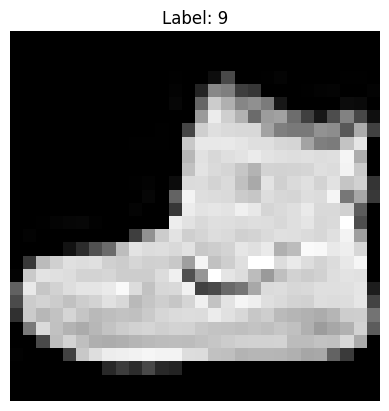

In [ ]:
plt.imshow(first_image.squeeze(), cmap="gray")
plt.title(f"Label: {first_label}")
plt.axis("off")
plt.show()

In [ ]:
train_size = int(len(train_dataset)*0.9)
val_size = len(train_dataset) - train_size

In [ ]:
train_dataset, val_dataset = dt.random_split(train_dataset, [train_size, val_size])

In [ ]:
train_loader = dt.DataLoader(train_dataset, batch_size=1024, shuffle = True)
### shuffle = True oznacza, że biorę cały train (55000 danych) i dzielę je losowo na
### paczki wielkośći 512. są one losowane na nowo w każdej epoce
val_loader = dt.DataLoader(val_dataset, batch_size = 1024, shuffle = False)
test_loader = dt.DataLoader(train_dataset, batch_size = 1024, shuffle = False)

In [ ]:
#### SANITY CHECK DZIAŁANIA MAXPOOLA

img = torch.randn(1, 1, 7, 7)  # [batch_size, channels, height, width]

# Define the max pooling operation
maxpool = nn.AdaptiveMaxPool2d(output_size = (4,4))

# Apply max pooling
output = maxpool(img)

print(f"Original image shape: {img.shape}")
print(f"After max pooling: {output.shape}")


Original image shape: torch.Size([1, 1, 7, 7])
After max pooling: torch.Size([1, 1, 4, 4])


In [ ]:
print(output)

tensor([[[[ 2.2992,  0.3061,  1.7959,  1.4193],
          [ 0.8919,  0.9724,  1.7959,  0.8338],
          [ 1.0288,  1.9646,  0.8338,  0.8338],
          [-0.2463,  1.9646,  2.5181,  2.5181]]]])


In [ ]:
class CNN(nn.Module):
  kernel_size = 3 ### kernel będzie wielkości 3x3
  def __init__(self):
    super().__init__()
    ## 8 - "wielkość warstwy, ilość neuronów w kolejnej warstwie".  Start: 28x28=784
    self.conv1 = nn.Conv2d(1, 4, self.kernel_size, padding = 1) #=> 14x14x4
    self.conv2 = nn.Conv2d(4, 8, self.kernel_size, padding = 1) #=> 7x7x8
    self.conv3 = nn.Conv2d(8, 16, self.kernel_size, padding = 1) #=> 3x3x16

    self.maxpool = nn.MaxPool2d(2,2)
    self.ada_maxpool_4_4 = nn.AdaptiveMaxPool2d(4,4)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()
    self.dropout = nn.Dropout(0.2)
    self.flatten = nn.Flatten()

    self.fc1 = nn.Linear(3*3*16, 64)
    self.fc2 = nn.Linear(64, 32)
    self.fc3 = nn.Linear(32, 10)

  def forward(self, input):
     step1 = self.maxpool(self.conv1(input))
     step2 = self.maxpool(self.relu(self.conv2(step1)))
     step3 = self.maxpool(self.relu(self.conv3(step2)))
     ### wyjscie - 2x2x64

     mlp1 = self.flatten(step3)
     mlp2 = self.relu(self.fc1(mlp1))
     mlp3 = self.relu(self.fc2(mlp2))
     mlp4 = self.dropout(mlp3)
     return self.sigmoid(self.fc3(mlp4))



In [ ]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optim = opt.Adam(model.parameters(), lr=0.001)

In [ ]:
for i in train_loader:
  print(i[0][0].shape)
  break

torch.Size([1, 28, 28])


In [ ]:
epochs = 100
train_losses = []
val_losses = []


for epoch in range(epochs):

  epoch_loss = 0

  for X_batch, y_batch in train_loader:
    optim.zero_grad() ## stwórz świeże miejsce na gradient
    print(X_batch.shape)
    output = model(X_batch) ###  forward_pass
    loss = criterion(torch.squeeze(output), y_batch) ### przeliczenie bledu
    loss.backward() ### obliczenie wszystkich gradientow
    optim.step() ### uzywa gradientow do aktualizacji wag
    epoch_loss += loss.item()

  val_epoch_loss = 0

  with torch.no_grad():
    for X_val_batch, y_val_batch in val_loader:
      val_output = model(X_val_batch)
      val_loss = criterion(torch.squeeze(val_output), y_val_batch)
      val_epoch_loss += val_loss

  train_losses.append(epoch_loss/len(train_loader))
  val_losses.append(val_epoch_loss/len(val_loader))
  print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f},VAL Loss: {val_epoch_loss:.4f}')


torch.Size([1024, 1, 28, 28])
torch.Size([1024, 1, 28, 28])
torch.Size([1024, 1, 28, 28])
torch.Size([1024, 1, 28, 28])
torch.Size([1024, 1, 28, 28])
torch.Size([1024, 1, 28, 28])
torch.Size([1024, 1, 28, 28])
torch.Size([1024, 1, 28, 28])
torch.Size([1024, 1, 28, 28])
torch.Size([1024, 1, 28, 28])
torch.Size([1024, 1, 28, 28])
torch.Size([1024, 1, 28, 28])
torch.Size([1024, 1, 28, 28])
torch.Size([1024, 1, 28, 28])
torch.Size([1024, 1, 28, 28])
torch.Size([1024, 1, 28, 28])
torch.Size([1024, 1, 28, 28])
torch.Size([1024, 1, 28, 28])
torch.Size([1024, 1, 28, 28])
torch.Size([1024, 1, 28, 28])
torch.Size([1024, 1, 28, 28])


KeyboardInterrupt: 

In [ ]:
! pip install torchview

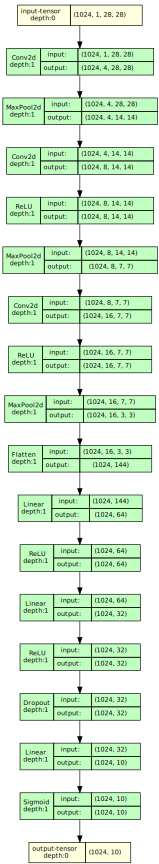

In [ ]:


from torchview import draw_graph
model_graph = draw_graph(model, input_data = X_batch, device='meta')
model_graph.visual_graph

### Powyższy problem z użyciem pytorch-accelerated
### https://pytorch-accelerated.readthedocs.io/en/latest/callbacks.html


In [ ]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optim = opt.Adam(model.parameters(), lr=0.001)


In [ ]:
!pip install pytorch_accelerated
from pytorch_accelerated import Trainer
from pytorch_accelerated import callbacks as cb

  Attempting uninstall: nvidia-cusolver-cu12
    Found existing installation: nvidia-cusolver-cu12 11.6.3.83
    Uninstalling nvidia-cusolver-cu12-11.6.3.83:
      Successfully uninstalled nvidia-cusolver-cu12-11.6.3.83


INFO:pytorch_accelerated:Setting random seeds


In [ ]:
esc = cb.EarlyStoppingCallback(early_stopping_patience=4)

trainer = Trainer(
    model = model,
    loss_func = nn.CrossEntropyLoss(),
    optimizer=opt.Adam(model.parameters(), lr=0.001),
    callbacks = [cb.LogMetricsCallback, cb.ProgressBarCallback]
)



In [ ]:
trainer.train(
    train_dataset = train_dataset,
    eval_dataset = val_dataset,
    num_epochs = 100,
    per_device_batch_size=512
)


100%|██████████| 106/106 [00:05<00:00, 17.68it/s]



train_loss_epoch: 1.5640751123428345



100%|██████████| 12/12 [00:00<00:00, 15.47it/s]



eval_loss_epoch: 1.5587470531463623



100%|██████████| 106/106 [00:07<00:00, 15.01it/s]



train_loss_epoch: 1.5635015964508057



100%|██████████| 12/12 [00:00<00:00, 14.92it/s]



eval_loss_epoch: 1.5561250448226929



100%|██████████| 106/106 [00:05<00:00, 17.88it/s]



train_loss_epoch: 1.5611597299575806



100%|██████████| 12/12 [00:00<00:00, 15.00it/s]



eval_loss_epoch: 1.5589876174926758



100%|██████████| 106/106 [00:07<00:00, 13.59it/s]



train_loss_epoch: 1.5596287250518799



100%|██████████| 12/12 [00:00<00:00, 15.41it/s]



eval_loss_epoch: 1.5545555353164673



100%|██████████| 106/106 [00:11<00:00,  9.19it/s]



train_loss_epoch: 1.5590770244598389



100%|██████████| 12/12 [00:01<00:00,  7.10it/s]



eval_loss_epoch: 1.554679036140442



 92%|█████████▏| 97/106 [00:11<00:00, 11.35it/s]

KeyboardInterrupt: 

In [ ]:
test_metrics = trainer.evaluate(
    dataset = test_dataset,
    per_device_batch_size = 64
)

In [ ]:
!pip install torcheval
from torcheval.metrics.functional import multiclass_f1_score as f1

In [ ]:
datapoint = torch.unsqueeze(test_dataset.data,1) /256


f1(model(datapoint), test_dataset.targets)

In [ ]:
model(datapoint)

tensor([[3.8216e-12, 2.9026e-10, 2.3265e-09,  ..., 9.9978e-01, 5.7682e-03,
         9.2964e-01],
        [3.1602e-03, 3.2675e-06, 9.5996e-01,  ..., 6.0814e-06, 3.3974e-02,
         4.1343e-06],
        [1.2836e-01, 1.0000e+00, 5.3181e-08,  ..., 5.7850e-08, 1.1448e-07,
         2.1855e-03],
        ...,
        [6.8847e-04, 4.0481e-06, 6.0770e-02,  ..., 3.6037e-02, 7.2606e-01,
         1.7998e-04],
        [6.9319e-04, 1.0000e+00, 1.5415e-08,  ..., 4.2149e-04, 5.3721e-07,
         9.9852e-01],
        [2.1365e-05, 2.3498e-04, 8.6493e-05,  ..., 9.9996e-01, 1.6566e-01,
         9.8495e-01]], grad_fn=<SigmoidBackward0>)

In [ ]:
datapoint = torch.unsqueeze(test_dataset.data,1) /256

In [ ]:
datapoint.shape

torch.Size([10000, 1, 28, 28])

# Klasyfikacja zbioru CIFAR10 za pomocą zwykłęgo modelu MLP oraz CNN

### https://lightning.ai/docs/torchmetrics/stable/classification/auroc.html

https://pytorch.org/vision/stable/datasets.html

In [ ]:
# 1. Pobierz CIFAR10 z modulu torchvision.datasets
# 2. Przygotuj dane oraz loadery
import torch
import torch.nn as nn
import torch.optim as opt
import torch.utils.data as dt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from torchvision import datasets, transforms
from torchvision.transforms import v2

In [ ]:
# Imagenette is a subset of 10 easily classified classes
# from Imagenet (tench, English springer, cassette player, chain saw, church,
#                French horn, garbage truck, gas pump, golf ball, parachute).


resize = transforms.Compose([
    transforms.Resize((28,28)),
    transforms.PILToTensor(),
    v2.ToDtype(torch.float32, scale=True),
    transforms.Normalize((0,0,0),(256,256,256), inplace = True)
                            ])



train_dataset = datasets.Imagenette(root='./data/img6_train', split='train', download=False, transform=resize)
val_dataset = datasets.Imagenette(root='./data/img6_val', split='val', download=False,  transform=resize)

# test_dataset = datasets.Imagenette(root='./data/img_test', split='test', download=True)



In [ ]:
train_size = int(len(train_dataset)*0.9)
test_size = len(train_dataset) - train_size

train_dataset, test_dataset = dt.random_split(train_dataset, [train_size, test_size])

In [ ]:
tensor_img = train_dataset[788][0]
transforms.functional.to_pil_image(tensor_img*256)

In [ ]:
tensor_img.shape

torch.Size([3, 28, 28])

In [ ]:
tensor_img

tensor([[[3.8143e-03, 3.7990e-03, 3.8143e-03,  ..., 1.3480e-03,
          1.5625e-03, 2.1446e-03],
         [3.7837e-03, 3.7684e-03, 3.7990e-03,  ..., 4.4424e-04,
          6.2806e-04, 2.5735e-03],
         [3.6765e-03, 3.6765e-03, 3.6918e-03,  ..., 9.0380e-04,
          8.7316e-04, 2.8799e-03],
         ...,
         [3.8909e-03, 3.8909e-03, 3.8909e-03,  ..., 1.0417e-03,
          1.4553e-03, 8.8848e-04],
         [3.8909e-03, 3.8909e-03, 3.8909e-03,  ..., 9.6507e-04,
          1.3480e-03, 1.2255e-03],
         [3.8756e-03, 3.8756e-03, 3.8756e-03,  ..., 9.1912e-04,
          1.1642e-03, 1.4706e-03]],

        [[3.7684e-03, 3.7377e-03, 3.7684e-03,  ..., 1.2255e-03,
          1.4093e-03, 1.9148e-03],
         [3.7224e-03, 3.6918e-03, 3.7684e-03,  ..., 5.2083e-04,
          7.0466e-04, 2.5735e-03],
         [3.5999e-03, 3.5846e-03, 3.5999e-03,  ..., 1.0110e-03,
          9.8039e-04, 2.9412e-03],
         ...,
         [3.9062e-03, 3.9062e-03, 3.9062e-03,  ..., 1.0110e-03,
          1.455

In [ ]:

len(train_dataset)

8522

In [ ]:
train_loader = dt.DataLoader(train_dataset, batch_size=32, shuffle = True)
### shuffle = True oznacza, że biorę cały train (55000 danych) i dzielę je losowo na
### paczki wielkośći 512. są one losowane na nowo w każdej epoce
val_loader = dt.DataLoader(val_dataset, batch_size = 4, shuffle = False)
test_loader = dt.DataLoader(train_dataset, batch_size = 4, shuffle = False)

In [ ]:
### Napisz model sieci MLP i wytrenuj go

class ImagenetteMLP(nn.Module):

  def __init__(self):
    super().__init__()

    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(3*28*28, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64,10)

    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.flatten(x)
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.sigmoid(self.fc3(x))
    return x


In [ ]:
# model = ImagenetteMLP()
# criterion = nn.CrossEntropyLoss()
# optim = opt.Adam(model.parameters(), lr=0.001)

In [ ]:
esc = cb.EarlyStoppingCallback(early_stopping_patience=4)

trainer = Trainer(
    model = model,
    loss_func = nn.CrossEntropyLoss(),
    optimizer=opt.Adam(model.parameters(), lr=0.001),
    callbacks = [cb.LogMetricsCallback, cb.ProgressBarCallback]
)

trainer.train(
    train_dataset = train_dataset,
    eval_dataset = val_dataset,
    num_epochs = 100,
    per_device_batch_size=512
)

100%|██████████| 17/17 [00:29<00:00,  1.71s/it]



train_loss_epoch: 2.1852807998657227


100%|██████████| 8/8 [00:13<00:00,  1.63s/it]



eval_loss_epoch: 2.1896800994873047


100%|██████████| 17/17 [00:37<00:00,  2.20s/it]



train_loss_epoch: 2.180039644241333


100%|██████████| 8/8 [00:13<00:00,  1.64s/it]



eval_loss_epoch: 2.1827433109283447


100%|██████████| 17/17 [00:31<00:00,  1.88s/it]



train_loss_epoch: 2.1749801635742188


100%|██████████| 8/8 [00:17<00:00,  2.21s/it]



eval_loss_epoch: 2.1780200004577637


100%|██████████| 17/17 [00:31<00:00,  1.82s/it]



train_loss_epoch: 2.1690802574157715


100%|██████████| 8/8 [00:18<00:00,  2.25s/it]



eval_loss_epoch: 2.172541856765747


100%|██████████| 17/17 [00:31<00:00,  1.87s/it]



train_loss_epoch: 2.1636857986450195


100%|██████████| 8/8 [00:15<00:00,  1.92s/it]



eval_loss_epoch: 2.166827440261841


100%|██████████| 17/17 [00:28<00:00,  1.65s/it]



train_loss_epoch: 2.1583750247955322


100%|██████████| 8/8 [00:12<00:00,  1.62s/it]



eval_loss_epoch: 2.1624536514282227


100%|██████████| 17/17 [00:28<00:00,  1.67s/it]



train_loss_epoch: 2.153474807739258


100%|██████████| 8/8 [00:13<00:00,  1.63s/it]



eval_loss_epoch: 2.157648801803589


100%|██████████| 17/17 [00:28<00:00,  1.67s/it]



train_loss_epoch: 2.148688793182373


100%|██████████| 8/8 [00:13<00:00,  1.64s/it]



eval_loss_epoch: 2.1525511741638184


100%|██████████| 17/17 [00:29<00:00,  1.72s/it]



train_loss_epoch: 2.1449978351593018


100%|██████████| 8/8 [00:13<00:00,  1.65s/it]



eval_loss_epoch: 2.150747299194336


100%|██████████| 17/17 [00:28<00:00,  1.67s/it]



train_loss_epoch: 2.1418654918670654


100%|██████████| 8/8 [00:13<00:00,  1.64s/it]



eval_loss_epoch: 2.1474483013153076


100%|██████████| 17/17 [00:28<00:00,  1.65s/it]



train_loss_epoch: 2.1377201080322266


100%|██████████| 8/8 [00:13<00:00,  1.65s/it]



eval_loss_epoch: 2.142442464828491


100%|██████████| 17/17 [00:28<00:00,  1.65s/it]



train_loss_epoch: 2.13433575630188


100%|██████████| 8/8 [00:13<00:00,  1.63s/it]



eval_loss_epoch: 2.139460802078247


100%|██████████| 17/17 [00:29<00:00,  1.71s/it]



train_loss_epoch: 2.131704330444336


100%|██████████| 8/8 [00:13<00:00,  1.64s/it]



eval_loss_epoch: 2.1361241340637207


100%|██████████| 17/17 [00:28<00:00,  1.65s/it]



train_loss_epoch: 2.1285367012023926


100%|██████████| 8/8 [00:12<00:00,  1.62s/it]



eval_loss_epoch: 2.1338698863983154


100%|██████████| 17/17 [00:27<00:00,  1.65s/it]



train_loss_epoch: 2.1253504753112793


100%|██████████| 8/8 [00:12<00:00,  1.62s/it]



eval_loss_epoch: 2.1313893795013428


100%|██████████| 17/17 [00:28<00:00,  1.66s/it]



train_loss_epoch: 2.122516632080078


100%|██████████| 8/8 [00:13<00:00,  1.64s/it]



eval_loss_epoch: 2.128950834274292


100%|██████████| 17/17 [00:29<00:00,  1.72s/it]



train_loss_epoch: 2.1196956634521484


100%|██████████| 8/8 [00:12<00:00,  1.62s/it]



eval_loss_epoch: 2.125544309616089


100%|██████████| 17/17 [00:27<00:00,  1.64s/it]



train_loss_epoch: 2.1169474124908447


100%|██████████| 8/8 [00:12<00:00,  1.62s/it]



eval_loss_epoch: 2.1240272521972656


100%|██████████| 17/17 [00:28<00:00,  1.65s/it]



train_loss_epoch: 2.114129066467285


100%|██████████| 8/8 [00:13<00:00,  1.63s/it]



eval_loss_epoch: 2.1208019256591797


100%|██████████| 17/17 [00:28<00:00,  1.66s/it]



train_loss_epoch: 2.1116063594818115


100%|██████████| 8/8 [00:12<00:00,  1.61s/it]



eval_loss_epoch: 2.12115740776062


100%|██████████| 17/17 [00:28<00:00,  1.70s/it]



train_loss_epoch: 2.1089513301849365


100%|██████████| 8/8 [00:12<00:00,  1.62s/it]



eval_loss_epoch: 2.1160199642181396


100%|██████████| 17/17 [00:28<00:00,  1.65s/it]



train_loss_epoch: 2.1060235500335693


100%|██████████| 8/8 [00:13<00:00,  1.63s/it]



eval_loss_epoch: 2.113571882247925


100%|██████████| 17/17 [00:27<00:00,  1.64s/it]



train_loss_epoch: 2.103975534439087


100%|██████████| 8/8 [00:12<00:00,  1.62s/it]



eval_loss_epoch: 2.1127071380615234


100%|██████████| 17/17 [00:28<00:00,  1.66s/it]



train_loss_epoch: 2.1014864444732666


100%|██████████| 8/8 [00:13<00:00,  1.64s/it]



eval_loss_epoch: 2.1098194122314453


100%|██████████| 17/17 [00:29<00:00,  1.71s/it]



train_loss_epoch: 2.1000800132751465


100%|██████████| 8/8 [00:13<00:00,  1.64s/it]



eval_loss_epoch: 2.1085305213928223


100%|██████████| 17/17 [00:28<00:00,  1.66s/it]



train_loss_epoch: 2.097505807876587


100%|██████████| 8/8 [00:13<00:00,  1.63s/it]



eval_loss_epoch: 2.1079349517822266


100%|██████████| 17/17 [00:28<00:00,  1.66s/it]



train_loss_epoch: 2.094900608062744


100%|██████████| 8/8 [00:13<00:00,  1.63s/it]



eval_loss_epoch: 2.103771209716797


100%|██████████| 17/17 [00:28<00:00,  1.65s/it]



train_loss_epoch: 2.0927624702453613


100%|██████████| 8/8 [00:13<00:00,  1.65s/it]



eval_loss_epoch: 2.10202956199646


100%|██████████| 17/17 [00:28<00:00,  1.69s/it]



train_loss_epoch: 2.0909273624420166


100%|██████████| 8/8 [00:13<00:00,  1.64s/it]



eval_loss_epoch: 2.0997700691223145


100%|██████████| 17/17 [00:27<00:00,  1.64s/it]



train_loss_epoch: 2.089750289916992


100%|██████████| 8/8 [00:13<00:00,  1.63s/it]



eval_loss_epoch: 2.1006665229797363


100%|██████████| 17/17 [00:27<00:00,  1.64s/it]



train_loss_epoch: 2.0880587100982666


100%|██████████| 8/8 [00:12<00:00,  1.61s/it]



eval_loss_epoch: 2.0968828201293945


100%|██████████| 17/17 [00:28<00:00,  1.66s/it]



train_loss_epoch: 2.0863051414489746


100%|██████████| 8/8 [00:13<00:00,  1.63s/it]



eval_loss_epoch: 2.0950076580047607


100%|██████████| 17/17 [00:28<00:00,  1.66s/it]



train_loss_epoch: 2.084904432296753


100%|██████████| 8/8 [00:13<00:00,  1.63s/it]



eval_loss_epoch: 2.0949273109436035


100%|██████████| 17/17 [00:28<00:00,  1.69s/it]



train_loss_epoch: 2.0838634967803955


100%|██████████| 8/8 [00:13<00:00,  1.63s/it]



eval_loss_epoch: 2.0939218997955322


100%|██████████| 17/17 [00:28<00:00,  1.66s/it]



train_loss_epoch: 2.0828099250793457


100%|██████████| 8/8 [00:12<00:00,  1.62s/it]



eval_loss_epoch: 2.092629909515381


100%|██████████| 17/17 [00:30<00:00,  1.77s/it]



train_loss_epoch: 2.081510543823242


100%|██████████| 8/8 [00:17<00:00,  2.19s/it]



eval_loss_epoch: 2.091067314147949


100%|██████████| 17/17 [00:32<00:00,  1.94s/it]



train_loss_epoch: 2.080425500869751


100%|██████████| 8/8 [00:16<00:00,  2.10s/it]



eval_loss_epoch: 2.090507745742798


100%|██████████| 17/17 [00:27<00:00,  1.65s/it]



train_loss_epoch: 2.079531192779541


100%|██████████| 8/8 [00:16<00:00,  2.01s/it]



eval_loss_epoch: 2.0896804332733154


100%|██████████| 17/17 [00:31<00:00,  1.88s/it]



train_loss_epoch: 2.0783944129943848


100%|██████████| 8/8 [00:12<00:00,  1.62s/it]



eval_loss_epoch: 2.088168144226074


100%|██████████| 17/17 [00:28<00:00,  1.67s/it]



train_loss_epoch: 2.0781660079956055


100%|██████████| 8/8 [00:13<00:00,  1.63s/it]



eval_loss_epoch: 2.08835768699646


100%|██████████| 17/17 [00:33<00:00,  1.99s/it]



train_loss_epoch: 2.0766868591308594


 38%|███▊      | 3/8 [00:06<00:08,  1.73s/it]

KeyboardInterrupt: 

In [ ]:
3*28*28

2352

In [ ]:
### [1,1] => shape (2,1)
### [[[[1,1]]]] => (1,1,2,1)

In [ ]:
### model -> [0,0,1,...,0]
### y_val_batch -> [3]

0

In [ ]:
len(val_loader)

2

In [ ]:
epochs = 5
train_losses = []
val_losses = []


for epoch in range(epochs):

  epoch_loss = 0

  for X_batch, y_batch in train_loader:
    optim.zero_grad() ## stwórz świeże miejsce na gradient
    output = model(X_batch.float()) ###  forward_pass
    loss = criterion(torch.squeeze(output), y_batch) ### przeliczenie bledu
    loss.backward() ### obliczenie wszystkich gradientow
    optim.step() ### uzywa gradientow do aktualizacji wag
    epoch_loss += loss.item()

  val_epoch_loss = 0

  with torch.no_grad():
    for X_val_batch, y_val_batch in val_loader:
      val_output = model(X_val_batch.float())
      val_loss = criterion(val_output, y_val_batch)
      val_epoch_loss += val_loss

  train_losses.append(epoch_loss/len(train_loader))
  val_losses.append(val_epoch_loss/len(val_loader))
  print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f},VAL Loss: {val_epoch_loss:.4f}')


Epoch 1/5, Loss: 610.4530,VAL Loss: 2203.4155


KeyboardInterrupt: 

In [ ]:
!pip install torchsummary
from torchsummary import summary

In [ ]:
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)
output.backward()

In [ ]:
input

tensor([[-0.2266, -0.3068,  0.4416, -1.3690, -0.8120],
        [ 0.0482,  1.5139,  1.1069,  0.8176, -0.5328],
        [ 0.4407, -1.9474, -1.6107,  0.3650, -1.0656]], requires_grad=True)

In [ ]:
target

tensor([[0.4404, 0.0436, 0.1626, 0.1147, 0.2387],
        [0.0477, 0.2397, 0.0904, 0.1682, 0.4541],
        [0.4369, 0.0431, 0.0239, 0.0507, 0.4454]])

In [ ]:
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5).softmax(dim=1)
output = loss(input, target)
output.backward()

In [ ]:
### ZADANIE: WYTRENUJ SIEĆ KONWOLUCYJNĄ DLA TASKU IMAGENETTE

### PLIS PRZERZYJ TEN NOTATNIK LUB NASZĄ TABLICĘ I
### ZASTANÓW SIĘ CZY WSZYSTKO W MIARĘ ROZUMIEM

# https://miro.com/app/board/uXjVLoG2CLg=/

In [ ]:
### Zadanie: Napisz model CNN dla tasku Imagenette, wystarczy sam trening

class ImagenetteCNN(nn.Module):

  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv2d(3,4,(3,3), padding=1)
    self.conv2 = nn.Conv2d(4,8,(3,3), padding=1)
    self.conv3 = nn.Conv2d(8,16,(3,3), padding=1)

    self.maxpool = nn.MaxPool2d((2,2))

    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(144, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 32)
    self.fc4 = nn.Linear(32, 16)
    self.fc5 = nn.Linear(16,10)

    self.skip_con = nn.Linear(128,16)

    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()
    self.dropout = nn.Dropout()

  def forward(self, x):
    x = self.conv1(x)
    x = self.maxpool(x) # 4x14x14

    x = self.conv2(x)
    x = self.maxpool(x) # 8x7x7

    x = self.conv3(x)
    x = self.maxpool(x)
    x = self.relu(x) # 16x2x2


    x = self.flatten(x)
    x = self.relu(self.fc1(x)) #256
    x = self.relu(self.fc2(x)) #128

    skip = self.skip_con(x) #16

    x = self.relu(self.fc3(x)) #32

    x = self.relu(self.fc4(x)) + skip #16

    x = self.dropout(x)
    final_x = self.fc5(x)

    return self.sigmoid(x)

In [ ]:
esc = cb.EarlyStoppingCallback(early_stopping_patience=4)

model = ImagenetteCNN()
criterion = nn.CrossEntropyLoss()
optim = opt.Adam(model.parameters(), lr=0.001)

epochs = 5
train_losses = []
val_losses = []

for epoch in range(epochs):

  epoch_loss = 0

  for X_batch, y_batch in train_loader:
    optim.zero_grad() ## stwórz świeże miejsce na gradient
    output = model(X_batch.float()) ###  forward_pass
    loss = criterion(torch.squeeze(output), y_batch) ### przeliczenie bledu
    loss.backward() ### obliczenie wszystkich gradientow
    optim.step() ### uzywa gradientow do aktualizacji wag
    epoch_loss += loss.item()

  val_epoch_loss = 0

  with torch.no_grad():
    for X_val_batch, y_val_batch in val_loader:
      val_output = model(X_val_batch.float())
      val_loss = criterion(val_output, y_val_batch)
      val_epoch_loss += val_loss

KeyboardInterrupt: 

In [ ]:
# Zadanie:


# https://github.com/rois-codh/kmnist

# Przeczytaj markdown powyższego repo i ściągnij dataset
# Dla powyższego tasku wytrenuj prosty algorytm w PyTorchu. Zastosuj preprocessing danych
# który będzie je augmentował na bieżąco. Sprawdź czy owa augmentacja pomaga Twojemu modelowi
# Przykład -> losowy obrót + szum gaussowski
# Pamiętaj o prostej analizie danych - czy masz zbalansowane klasy itd.


# https://pytorch.org/vision/main/transforms.html#transform-classes-functionals-and-kernels

In [ ]:
### Etap 1 - download datasetu + EDA (15 minut)

In [ ]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torchvision.transforms import v2
import matplotlib.pyplot as plt
from torch.utils.data import ConcatDataset
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.ToTensor(),
                                v2.ToDtype(torch.float32, scale=True)])

train_data = datasets.KMNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.KMNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 18.2M/18.2M [00:17<00:00, 1.06MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 201kB/s]
100%|██████████| 3.04M/3.04M [00:02<00:00, 1.14MB/s]
100%|██████████| 5.12k/5.12k [00:00<00:00, 9.96MB/s]


In [ ]:
tensor_img = train_data[788][0]
transforms.functional.to_pil_image(tensor_img)

In [ ]:
tensor_img

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.4745, 0.9882, 0.6039, 0.0314,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.6980, 0.9922, 0.6392, 0.1216,
          0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.6510, 0.9922, 0.9725, 0.7176,
          0.3608, 0.1451, 0.0157, 0.0000, 0.0118, 0.4431, 0.5569, 0.4941,
          0.1412, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.1490, 0.7569, 0.9569, 0.9804,
          0.9882, 0.8588, 0.4627, 0.2235, 0.2039, 0.8941, 1.0000, 1.0000,
          0.6118, 0.0196, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
#### augmentacja

### do poniższego kodu wrzuć dwie augmentacje:
# jedną działającą na całe zdjęcie (typu przesunięcie, obrót itd)
# oraz jedną na pixele (szum gaussowski, salt/pepper)


aug_transform = transforms.Compose([
                                    transforms.ToTensor(),
                                    v2.RandomInvert(0.2),
                                    v2.GaussianNoise(0.5, 0.05),
                                v2.ToDtype(torch.float32, scale=True),
                                ])

aug_train_data = datasets.KMNIST(root='./data', train=True, download=True, transform=aug_transform)


In [ ]:
aug_train_data = ConcatDataset([train_data, aug_train_data])

In [ ]:
train_loader = DataLoader(train_data, batch_size = 512, shuffle = True)
aug_train_loader = DataLoader(aug_train_data, batch_size = 512, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 64, shuffle = False)

In [ ]:
# TypeError: linear(): argument 'input' (position 1) must be Tensor, not Flatten

class KMNISTModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,32,3,1,1) # input_chan, output_chan, kernel_size, stride, padding
    self.conv2 = nn.Conv2d(32,64,3,1,1)

    self.maxpool = nn.MaxPool2d(2)

    self.fc1 = nn.Linear(7*7*64, 128)
    self.fc2 = nn.Linear(128,32)
    self.fc3 = nn.Linear(32,10)

    self.skip_con = nn.Linear(128,10)

    self.flatten = nn.Flatten()
    self.relu = nn.ReLU()
    self.softmax = nn.Softmax()

# napisz metode forward ze skip connection
  def forward(self, x):
    x = self.conv1(x)
    x = self.maxpool(x)
    x = self.conv2(x)
    x = self.maxpool(x)

    x = self.relu(x)

    x = self.flatten(x)
    x = self.relu(self.fc1(x))
    skip = self.skip_con(x)
    x = self.relu(self.fc2(x))
    x = self.relu(self.fc3(x)) + skip
    return self.softmax(x)

In [ ]:
! pip install pytorch_lightning

In [ ]:
import pytorch_lightning as pl
import torchmetrics as tm

class KMNISTModel_PL(pl.LightningModule):
  def __init__(self):
    super().__init__()
    self.model = KMNISTModel()
    self.criterion = nn.CrossEntropyLoss()
    self.metric = tm.AUROC('multiclass', num_classes=10) #AUC

  def forward(self, x):
     return self.model(x)

  def training_step(self, batch):
    X, y = batch
    pred = self.forward(X)
    loss = self.criterion(pred, y)
    auc = self.metric(pred,y)

    self.log('train_loss: ', loss)
    self.log('train_auc: ', auc, prog_bar=True) ### robi to co tdqm

  def configure_optimizers(self):
    return torch.optim.Adam(self.model.parameters())




In [ ]:
model = KMNISTModel_PL()
trainer = pl.Trainer(max_epochs = 10)
trainer.fit(model, aug_train_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | KMNISTModel      | 426 K  | train
1 | criterion | CrossEntropyLoss | 0      | train
2 | metric    | MulticlassAUROC  | 0      | train
-------------------------------------------------------
426 K     Trainable params
0         Non-trainable params
426 K     Total params
1.704     Total estimated model params size (MB)
13        Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/loops/optimization/automatic.py:134: `training_step` returned `None`. If this was on purpose, ignore this warning...
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


# RNN - Recurrent Neural Network

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# sztuczne dane:

time = np.array(range(20))
data = np.array([np.sin(time/2),np.cos(time/2)])
# dane = [
    # [sinusy],
    # [cosinusy]
# ] -- ma wielkosc, 2x10

# chcemy 10x2 - 10 elementow w sekwencji, po 2 cechy

In [ ]:
np.sin(time).reshape(1,-1).shape

(1, 20)

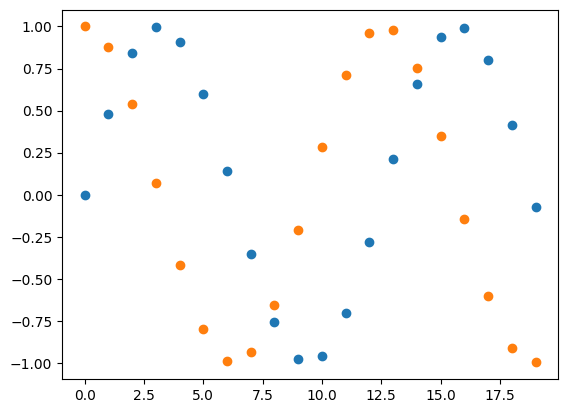

In [ ]:
plt.scatter(time, data[0])
plt.scatter(time, data[1])
plt.show()

In [ ]:
X = torch.tensor(data.reshape(100,2)[:-1, :]).float()
y = torch.tensor(data.reshape(100,2)[-1, :]).float()

In [ ]:
X.shape

torch.Size([99, 2])

In [ ]:
y

tensor([-0.9304, -0.8892])

In [ ]:
# https://pytorch.org/docs/stable/generated/torch.nn.RNN.html
## forecasting

## nasze dane -> [[9,2]] -> sekwencja 9ciu elementów, każdy po 2 cechy

class SimpleRNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.rnn = nn.RNN(2, 50) ## 2 bo xi ma dwa elementy - , 5 - wielkosc pamieci
    self.fc1 = nn.Linear(50, 2) ### y = sigmoid(W_y * h_t + B_y)
    # self.H = np.zeros((9, 5)) ## NIE JEST POTRZEBNE

  def forward(self, x):
    ### H - macierz której kolumny to kolejne stany ukryte
    ### x powinien być 9x2 (dl_sekw x ilosc_cech), h0
    H, h_last = self.rnn(x) ## H - wielkosci dlugosc_sekwencji x wielkość pamięci w stanie ukrytym , h_last - ostatni stan ukryty
    ### h_last - wielkosc 1x5
    # self.H =self.H + H # NIE JEST POTRZEBNE
    out = self.fc1(h_last)
    return out

# input_size – The number of expected features in the input x

# hidden_size – The number of features in the hidden state h

In [ ]:
## Zadanko: Zainicjalizuj oraz przetrenuj poniższy model,
## narysuj dane prawdziwe vs to co otrzymaliśmy z RNN

## (*) można też spróbować przewidywać kolejne wartości
## x1,...,x9 -> y_pred1
## ucinamy x1, zostają x2,..,x9, dorzucam y_pred1 na koniec: x2,...,x9,y_pred -> y_pred2
## ponownie: x3,...,x9, ypred1, ypred2 -> y_pred3

model = SimpleRNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())


epochs = 80

for epoch in range(epochs):

  # epoch_loss = 0

  # for x,y in batches:
  optimizer.zero_grad()
  output = model(X)
  loss = criterion(output.squeeze(), y.squeeze())
  loss.backward()
  optimizer.step()
  # epoch_loss += loss.item()

  # losses_per_epochs.append(epoch_loss/len(batches))

  print(f'Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}')


Epoch 1/80, Loss: 0.8276
Epoch 2/80, Loss: 0.7644
Epoch 3/80, Loss: 0.7042
Epoch 4/80, Loss: 0.6463
Epoch 5/80, Loss: 0.5896
Epoch 6/80, Loss: 0.5333
Epoch 7/80, Loss: 0.4761
Epoch 8/80, Loss: 0.4176
Epoch 9/80, Loss: 0.3575
Epoch 10/80, Loss: 0.2961
Epoch 11/80, Loss: 0.2342
Epoch 12/80, Loss: 0.1735
Epoch 13/80, Loss: 0.1167
Epoch 14/80, Loss: 0.0671
Epoch 15/80, Loss: 0.0291
Epoch 16/80, Loss: 0.0062
Epoch 17/80, Loss: 0.0004
Epoch 18/80, Loss: 0.0097
Epoch 19/80, Loss: 0.0279
Epoch 20/80, Loss: 0.0466
Epoch 21/80, Loss: 0.0593
Epoch 22/80, Loss: 0.0637
Epoch 23/80, Loss: 0.0603
Epoch 24/80, Loss: 0.0512
Epoch 25/80, Loss: 0.0393
Epoch 26/80, Loss: 0.0269
Epoch 27/80, Loss: 0.0159
Epoch 28/80, Loss: 0.0077
Epoch 29/80, Loss: 0.0026
Epoch 30/80, Loss: 0.0005
Epoch 31/80, Loss: 0.0007
Epoch 32/80, Loss: 0.0025
Epoch 33/80, Loss: 0.0051
Epoch 34/80, Loss: 0.0077
Epoch 35/80, Loss: 0.0099
Epoch 36/80, Loss: 0.0112
Epoch 37/80, Loss: 0.0116
Epoch 38/80, Loss: 0.0112
Epoch 39/80, Loss: 0.

In [ ]:
future_outputs = []
train = X
for i in range(1,21):
  pred = model(train)
  future_outputs.append(pred.detach().squeeze().numpy())
  train = torch.cat([train[1:], pred])

In [ ]:
future_outputs

[array([-0.9446193, -0.8951656], dtype=float32),
 array([-0.9409863, -0.8940787], dtype=float32),
 array([-0.9383072 , -0.89126927], dtype=float32),
 array([-0.9373996, -0.8895099], dtype=float32),
 array([-0.93692255, -0.8890264 ], dtype=float32),
 array([-0.9362709 , -0.88887167], dtype=float32),
 array([-0.93611383, -0.8887549 ], dtype=float32),
 array([-0.93594956, -0.888708  ], dtype=float32),
 array([-0.9359006, -0.8886581], dtype=float32),
 array([-0.9358629, -0.8886382], dtype=float32),
 array([-0.93584526, -0.88862926], dtype=float32),
 array([-0.9358381 , -0.88862467], dtype=float32),
 array([-0.9358327, -0.8886218], dtype=float32),
 array([-0.9358307 , -0.88861996], dtype=float32),
 array([-0.9358293 , -0.88861877], dtype=float32),
 array([-0.93582857, -0.8886183 ], dtype=float32),
 array([-0.9358281, -0.888618 ], dtype=float32),
 array([-0.93582785, -0.8886178 ], dtype=float32),
 array([-0.93582773, -0.8886177 ], dtype=float32),
 array([-0.93582773, -0.8886176 ], dtype=floa

In [ ]:
data_pred = np.concatenate([X.detach().numpy(),np.array(future_outputs)])

In [ ]:
data_pred

array([[ 0.        ,  0.09983341],
       [ 0.19866933,  0.29552022],
       [ 0.38941833,  0.47942555],
       [ 0.5646425 ,  0.64421767],
       [ 0.7173561 ,  0.7833269 ],
       [ 0.84147096,  0.89120734],
       [ 0.9320391 ,  0.9635582 ],
       [ 0.98544973,  0.997495  ],
       [ 0.9995736 ,  0.9916648 ],
       [ 0.9738476 ,  0.9463001 ],
       [ 0.9092974 ,  0.86320937],
       [ 0.8084964 ,  0.7457052 ],
       [ 0.6754632 ,  0.5984721 ],
       [ 0.5155014 ,  0.42737988],
       [ 0.33498815,  0.23924933],
       [ 0.14112   ,  0.04158066],
       [-0.05837414, -0.15774569],
       [-0.25554112, -0.35078323],
       [-0.44252044, -0.5298361 ],
       [-0.6118579 , -0.68776613],
       [-0.7568025 , -0.8182771 ],
       [-0.8715758 , -0.91616595],
       [-0.9516021 , -0.9775301 ],
       [-0.993691  , -0.9999232 ],
       [-0.9961646 , -0.98245263],
       [-0.9589243 , -0.9258147 ],
       [-0.8834547 , -0.83226746],
       [-0.7727645 , -0.7055403 ],
       [-0.63126665,

In [ ]:
time = range(120)
data_real = np.array([np.sin(time),np.cos(time)])

ValueError: x and y must be the same size

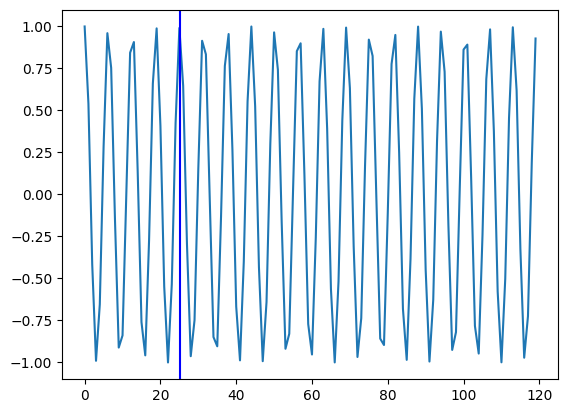

In [ ]:
plt.plot(time, data_real[1])
plt.axvline(x = 8*np.pi, color = 'b', label = 'axvline - full height')
plt.scatter(time, data_pred[1])
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

def analyze_problem(model, model_name):
  # Generate the sine wave data
  def generate_sine_wave(n_samples=120, frequency=0.1, noise=0.1):
      x = np.linspace(0, 25, n_samples)
      y = np.sin(2 * np.pi * frequency * x)
      # Add some noise to make it more realistic
      y += np.random.normal(0, noise, n_samples)
      return x, y

  # Parameters
  n_samples = 120  # 100 for training, 20 for prediction
  n_train = 80
  n_predict = 40
  frequency = 0.2
  noise = 0.05
  seq_length = 50
  hidden_size = 50
  batch_size = 16
  num_epochs = 100
  learning_rate = 0.01

  # Generate data
  x, y = generate_sine_wave(n_samples, frequency, noise)

  # Create sequences for training
  def create_sequences(data, seq_length):
      xs, ys = [], []
      for i in range(len(data) - seq_length):
          xs.append(data[i:i+seq_length])
          ys.append(data[i+seq_length])
      return np.array(xs), np.array(ys)

  # Use the first 100 points for training
  train_data = y[:n_train]

  # Create sequences
  X_train, y_train = create_sequences(train_data, seq_length)

  # Convert to PyTorch tensors
  X_train_tensor = torch.FloatTensor(X_train).unsqueeze(2)  # Shape: [batch, seq_len, features]
  y_train_tensor = torch.FloatTensor(y_train)

  # Create DataLoader
  train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


  # Loss and optimizer
  criterion = nn.MSELoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  # Train the model
  losses = []
  for epoch in range(num_epochs):
      epoch_loss = 0
      for batch_X, batch_y in train_loader:
          # Forward pass
          outputs = model(batch_X)
          loss = criterion(outputs.squeeze(), batch_y)

          # Backward and optimize
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          epoch_loss += loss.item()

      avg_loss = epoch_loss / len(train_loader)
      losses.append(avg_loss)

      if (epoch+1) % 10 == 0:
          print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

  # Function to predict the next n values
  def predict_sequence(model, seed_sequence, n_predict):
      model.eval()
      predictions = []
      current_sequence = seed_sequence.copy()

      with torch.no_grad():
          for _ in range(n_predict):
              # Convert to tensor
              x_input = torch.FloatTensor(current_sequence).unsqueeze(0).unsqueeze(2)  # Shape: [1, seq_len, 1]

              # Get prediction
              output = model(x_input)
              next_val = output.item()

              # Store prediction
              predictions.append(next_val)

              # Update sequence
              current_sequence = np.append(current_sequence[1:], next_val)

      return predictions

  # Get the last sequence from training data as seed
  seed_sequence = train_data[-seq_length:]

  # Predict the next 20 values
  predictions = predict_sequence(model, seed_sequence, n_predict)

  # Plot the results
  plt.figure(figsize=(12, 6))
  plt.plot(range(len(train_data)), train_data, 'b-', label='Training Data (100 points)')
  plt.plot(range(len(train_data), len(train_data) + len(predictions)), predictions, 'r-', label='Predictions (20 points)')
  plt.plot(range(n_train, n_train + n_predict), y[n_train:n_train + n_predict], 'g--', label='Actual Values')
  plt.legend()
  plt.title(f'PyTorch {model_name} Time Series Prediction of Sine Wave')
  plt.xlabel('Time Steps')
  plt.ylabel('Value')
  plt.grid(True)
  plt.show()

  # Calculate error metrics
  if n_predict <= len(y) - n_train:
      actual_values = y[n_train:n_train + n_predict]
      predictions_np = np.array(predictions)
      mse = np.mean((predictions_np - actual_values) ** 2)
      rmse = np.sqrt(mse)
      mae = np.mean(np.abs(predictions_np - actual_values))
      print(f"Mean Squared Error: {mse:.4f}")
      print(f"Root Mean Squared Error: {rmse:.4f}")
      print(f"Mean Absolute Error: {mae:.4f}")

  # Plot the training loss
  plt.figure(figsize=(10, 4))
  plt.plot(losses)
  plt.title('Training Loss over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.grid(True)
  plt.show()

Epoch [10/100], Loss: 0.1128
Epoch [20/100], Loss: 0.0235
Epoch [30/100], Loss: 0.0105
Epoch [40/100], Loss: 0.0076
Epoch [50/100], Loss: 0.0069
Epoch [60/100], Loss: 0.0063
Epoch [70/100], Loss: 0.0062
Epoch [80/100], Loss: 0.0058
Epoch [90/100], Loss: 0.0055
Epoch [100/100], Loss: 0.0048


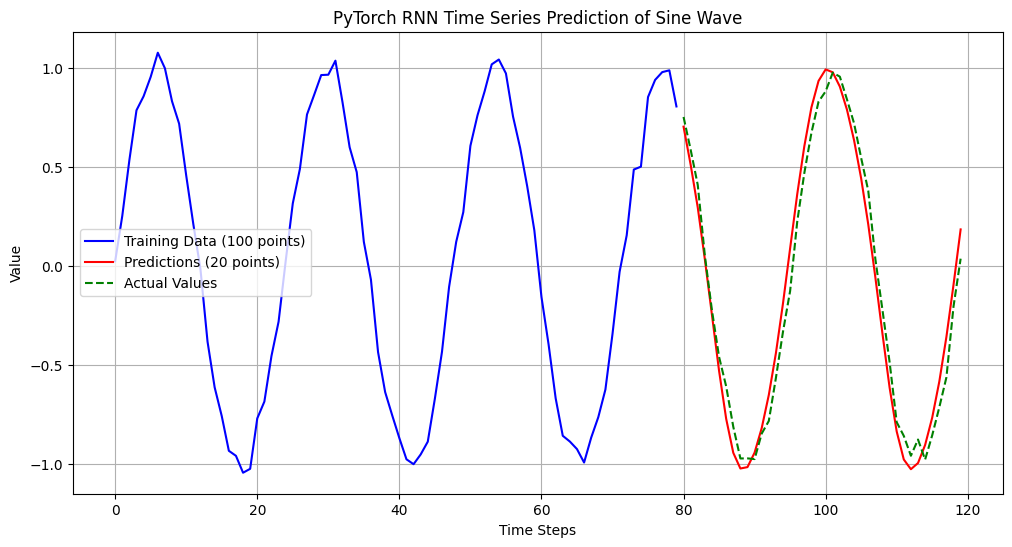

Mean Squared Error: 0.0122
Root Mean Squared Error: 0.1105
Mean Absolute Error: 0.0988


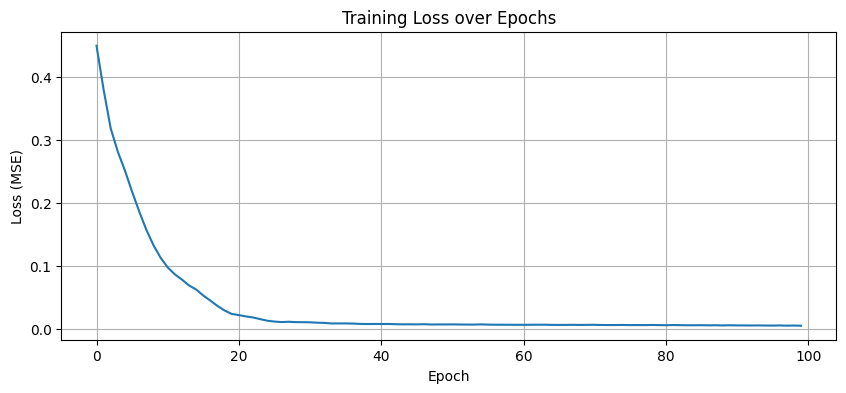

In [ ]:

class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x shape: [batch, seq_len, features]
        batch_size = x.size(0)

        # Initialize hidden state
        h0 = torch.zeros(1, batch_size, self.hidden_size).to(x.device)

        # Forward propagate RNN
        out, _ = self.rnn(x, h0)

        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

# Initialize model
model = SimpleRNN(input_size=1, hidden_size=5, output_size=1)
analyze_problem(model, 'RNN')

In [ ]:
class LSTMModel(nn.Module):
  def __init__(self, input_size, hidden_size):
    super().__init__()

    self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
    self.fc = nn.Linear(hidden_size, 1)

  def forward(self, x):
    # Outputs: output, (h_n, c_n)
      out, _ = self.lstm(x)

        # Decode the hidden state of the last time step
      out = self.fc(out[:, -1, :])
      return out

Epoch [10/100], Loss: 0.3861
Epoch [20/100], Loss: 0.1481
Epoch [30/100], Loss: 0.0307
Epoch [40/100], Loss: 0.0117
Epoch [50/100], Loss: 0.0088
Epoch [60/100], Loss: 0.0069
Epoch [70/100], Loss: 0.0061
Epoch [80/100], Loss: 0.0052
Epoch [90/100], Loss: 0.0045
Epoch [100/100], Loss: 0.0040


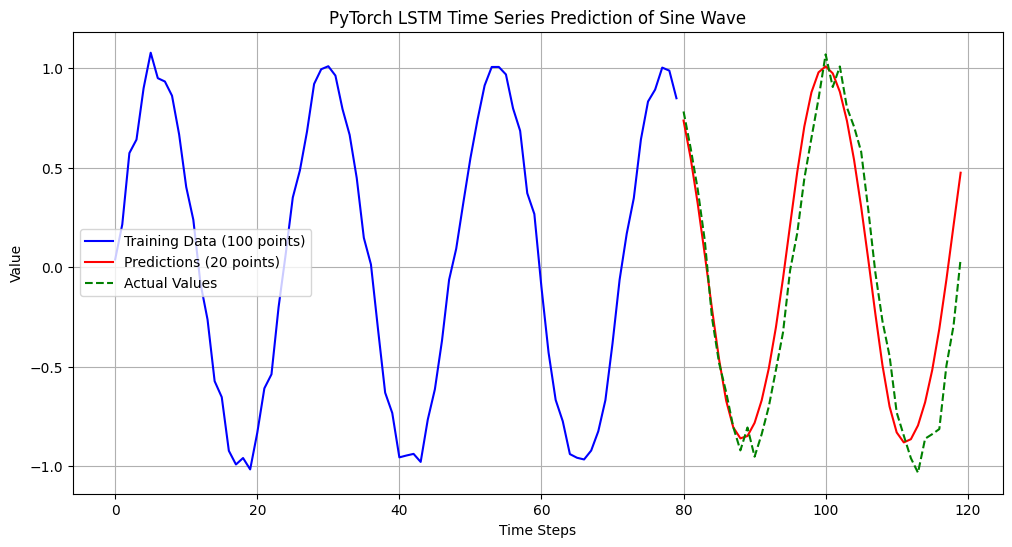

Mean Squared Error: 0.0493
Root Mean Squared Error: 0.2220
Mean Absolute Error: 0.1793


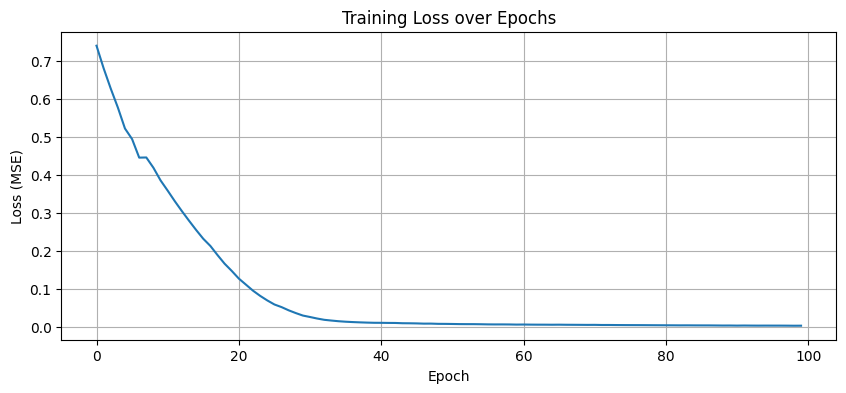

In [ ]:
lstm_model = LSTMModel(1,5)
analyze_problem(lstm_model, 'LSTM')

# Korzystanie z API

In [ ]:
#### Stwórz usprawniacz kodu w jupyterze, który będzie stosował api GPT
from IPython.core.magic import register_cell_magic

@register_cell_magic
def improve_code_with_gpt(line, cell):

  response = client.responses.create(
    model="gpt-4o-mini",
    instructions = 'You will receive content of ipynb cell. You should make it more readable, efficient and pythonic. Skip any comments or explanations',
    input=f"{cell}",
    max_output_tokens=128,
  )

  printmd(response.output_text)


In [ ]:
%%improve_code_with_gpt
def Sum_Of_X_Y_Z(x,y,z):
  SumOfThoseNumbers = x+y+z -2 + 2
  return SumOfThoseNumbers

```python
def sum_of_x_y_z(x, y, z):
    return x + y + z
```

# Cross-Validation

In [ ]:
#https://scikit-learn.org/stable/datasets/real_world.html
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_linnerud
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

data = load_linnerud()
X,y = data.data, data.target

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X[:10],y[:10])

LinearRegression()

In [ ]:
y_pred = model.predict(X[:10])

In [ ]:
r2_score(y[:10],y_pred)

0.4521915388463273

In [ ]:
# Próba 2 - z użyciem CV
model = LinearRegression()

In [ ]:
kf = KFold(n_splits=10, shuffle=True)

scores = cross_val_score(model, X, y, cv = kf, scoring = 'r2')

In [ ]:
scores

array([-8.03790843, -0.13151759])

In [ ]:
### Podejrzewamy, że dane są problematyczne.
### Ze względu na ich wymiar nie jesteśmy w stanie ich bezpośrednio narysować
### Przeanalizuj w wybrany sposób czy faktycznie jest tak źle.

array([[191.,  36.,  50.],
       [189.,  37.,  52.],
       [193.,  38.,  58.],
       [162.,  35.,  62.],
       [189.,  35.,  46.],
       [182.,  36.,  56.],
       [211.,  38.,  56.],
       [167.,  34.,  60.],
       [176.,  31.,  74.],
       [154.,  33.,  56.],
       [169.,  34.,  50.],
       [166.,  33.,  52.],
       [154.,  34.,  64.],
       [247.,  46.,  50.],
       [193.,  36.,  46.],
       [202.,  37.,  62.],
       [176.,  37.,  54.],
       [157.,  32.,  52.],
       [156.,  33.,  54.],
       [138.,  33.,  68.]])

# Grid search - przeszukiwanie hiperparametrów


In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import load_iris()
from sklearn.model_selection import train_test_split, GridSearchCV


### w sklearn każ∂y algorytm ma wersję ...C i ...R - ...Classifier oraz ...Regressor

# GIT - system kontroli wersji

- pozwala na tracking historii naszego projektu, na organizację pracy deweloperów, itd

- jeżeli wprowadzacie zmianę w projekcie, to GIT dosłownie porówna pliki litera po literze -> NIE WRZUCAMY NA GITA DUŻYCH PLIKÓW

- repozytorium - storage na projekt
  - local - folder na naszym komputerze z projektem oraz "obserwowany przez GIT"
  - remote - zdalne repozytorium, można pobrać jego kopię jako local, wprowadzić w localu zmiany i "wcisnąć" locala w remote

- w repozytorium NIE UMIESZCZAMY TEŻ:
  - wrażliwe dane, klucze dostępów - da się wprowadzić specjalny check przy wdrażaniu zmian który ich wrażliwość
  - śmieci
  - repo ma być proste, czyste, samowystarczające

---


---


Pytanie: Tworzymy Environment w projekcie, żeby były paczki potrzebne do uruchomienia programu. Czyli te pliki nie zamieszczamy na git-cie?

Odpowiedź:
  1. Każde dobre repozytorium ma plik requirements.txt w którym jest zbiór paczek które są potrzebne do uruchomienia repozytorium.
  ORAZ
  README.md - opis tego co się dzieje w repozytorium, tego co user powinien wiedzieć
  2. Enviroment (środowisko) jest niezależnym bytem od GITa, służy on do oddzielania lokalnie projektów i ich dependencji



git pull = git fetch + git merge

Case1: W środę main jest w wersji 1.41. Tego samego dnia tworzymy brancha test_branch jako odbitkę aktualnego maina.

W piątek chcemy wdrożyć nasze zmiany na maina. Problem jest taki, że już mamy maina w wersji 1.43.

In [1]:
!git

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | -P | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           [--super-prefix=<path>] [--config-env=<name>=<envvar>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone     Clone a repository into a new directory
   init      Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add       Add file contents to the index
   mv        Move or rename a file, a directory, or a symlink
   restore   Restore working tree files
   rm        Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect    Use binary search to find th

# Reinforcement Learning

- uczenie poprzez interakcję z otoczeniem
- definiujemy (na przykładzie odkurzacza):
  - agent - odkurzacz, obiekt uczenia
  - stan - aktualne położenie odkurzacza
  - akcja - możliwe do podjęcia zachowanie, np jazda prosto
  - środowisko - mieszkanie, coś z czym obiekt zachodzi w interakcje
  - nagroda - informacja zwrotna ze środowiska na temat podjętej akcji w danym stanie - chcemy ją maksymalizować


- value-based (Q-learning) - przypisanie wartości do stanu i akcji -> Q(state, action) - zwraca "jakość" zachowania

- policy-based - dla danego stanu "uczymy się" odpowiedniej akcji (dostosowanie akcji poprzez liczenie gradientu z nagrody)

- model-based - modelujemy całe środowisko na równo z agentem


Przykłady:
- odkurzacze Roomba
- AlphaGo, StockFish
- samochody autonomiczne




In [1]:
! pip install gym ### biblioteka do Reinforcement Learning https://www.gymlibrary.dev/

In [8]:
# ! pip uninstall -y numpy
! pip install numpy==1.23.5
!pip install swig
!pip install 'gymnasium[box2d]'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp311-cp311-linux_x86_64.whl size=2379440 sha256=3320c8c3810d264dc835a8aafd75550d332fbc3a37b9474603ac24631513f2d5
  Stored in directory: /root/.cache/pip/wheels/ab/f1/0c/d56f4a2bdd12bae0a0693ec33f2f0daadb5eb9753c78fa5308
Successfully built box2d-py


In [ ]:
import gym
import numpy as np

## Środowisko FrozenLake-v1 - tablica 4x4 zawierająca pola z lodem oraz z dziurami.
##

## Jedno z tych pól jest metą.
## Cel: Naucz się dojść z danego punktu do mety.

env = gym.make("FrozenLake-v1",is_slippery = False,render_mode="human")
Q = np.zeros((16,4)) ## 16 stanów, 4 akcje
non_exploration = 0.1
learning_rate = 0.1
discount = 0.9


for episode in range(1000):
  state = env.reset()
  finished = False

  while not finished:

    # 1. PODJĘCIE DECYZJI
    if np.random.rand() < non_exploration:
      ### "podobnie do inicjalizacji wag w sieci + szum losowy + odkorkowanie algorytmu"
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state])

    # 2. REALIZACJA DECYZJI
    next_state, reward, finished,  _ = env.step(action) ### stan w którym znajdziemy się po podjęciu action

    # 3. NAUKA Z KONSEKWENCJI NASZEJ DECYZJI
    previous_value = Q[state, action]
    future_factor = np.max(Q[next_state])

    Q[state, action] = previous_value + learning_rate * (reward + discount*future_factor - previous_value)

    state = next_state

# unpacking => a,b,c = (a,b,c)
### funkcja w pythonie zawsze zwraca jedną wartość! w wypadku wielu, zwracamy tak naprawdę tuple()


In [ ]:
# TEST

state = env.reset()
env.render()

# Argumenty pozycyjne i kluczowe (positional arguments, keyword arguments)



In [ ]:
model(X)

tensor([[0.9680, 1.0041]], grad_fn=<AddmmBackward0>)

In [ ]:
def is_rectangle_flat(width = 1, height = 1): #True, gdy jest szerszy niż dłuższy
  if width > height:
    return True
  elif height > width:
    return False
  else:
    print('SQUARE')
    return False

In [ ]:
print(is_rectangle_flat(2))

print(is_rectangle_flat(height = 2))

True
False


In [ ]:
is_rectangle_flat(2,1) == is_rectangle_flat(1,2)

False

In [ ]:
is_rectangle_flat(width = 1, height = 2) == is_rectangle_flat(height = 2, width = 1)

True

In [ ]:
is_rectangle_flat(2, height = 1)

True

In [ ]:
# zdefiniuj funkcję, któ®a przyjmuje dowolną ilość
# liczb W POSTACI ARGUMENTÓW POZYCYJNYCH i zwraca
# ich sume


# argujmenty pozycyjne <=> tuple

# *args - weź tuplę z argumentami i ją rozdziabaj na argumenty
def sum_all(*args):
  sum = 0
  for el in args:
    sum += el
  return sum

In [ ]:
sum_all(3,4,6,7,9,0,3,4,5)

41

In [ ]:
t = (5,23,5)
sum_all(*t)

33

In [ ]:
a = [1,2,3]
b = ['a','b','c']

for el1, el2 in zip(a,b): ## tuple unpacking
 print(el2, ' : ', el1)


a  :  1
b  :  2
c  :  3


In [ ]:
### Napisz funkcję greetings(...) która przyjmie dowolną ilość argumentów pozycyjnych (imiona)
### oraz jeden argument kluczowy (przywitanie jedno-słowne typu siema, hej, witam)

### ma ona przywitać w princie wszystkich tych ludzi.
### (*) dodatkowy punkcik za przemyślany return w tej funkcji

In [ ]:
names = ['mati', 'pati', 'kati', 'wlodi']
greeting = ['doberek', 'od kogo jestes kolezko', 'witaj byku', 'klaniam sie']

def powitanie(*args):
    imiona = args[0]
    # print(imiona)
    greetings = args[1]
    for imie_greeting in zip(imiona, greetings):
        print(imie_greeting)

In [ ]:
powitanie(names,greeting)

('mati', 'doberek')
('pati', 'od kogo jestes kolezko')
('kati', 'witaj byku')
('wlodi', 'klaniam sie')


In [ ]:
def greetings(*args, greeting):
    greetings_map = {}
    for name in args:
        greetings_map[name] = greeting

    return greetings_map

In [ ]:
imiona = ('Ala', 'Ola', 'Jan', 'Adam')
result = greetings(*imiona, greeting ='siema')
result

{'Ala': 'siema', 'Ola': 'siema', 'Jan': 'siema', 'Adam': 'siema'}

In [ ]:
### pozycyjne -> args -> kluczowe -> kwargs,

In [ ]:
# ZADANIE:
# napisz funkcję, która przyjmie dowolne informacje o osobie
# i je wyświetli. Podaj je w sposób kluczowy


def przedstaw_osobe(**kwargs):
  for key, value in kwargs.items():
    print(f'Cecha: {key}, Wartość: {value}')



In [ ]:
przedstaw_osobe(przemek = 2000, mirek = 1000, emilia = 'emilia')

Cecha: przemek, Wartość: 2000
Cecha: mirek, Wartość: 1000
Cecha: emilia, Wartość: emilia


In [ ]:
pm = {'przemek': 2000, 'mirek': 1000}
przedstaw_osobe(**pm)

Cecha: przemek, Wartość: 2000
Cecha: mirek, Wartość: 1000


In [2]:
%autosave 10

Autosaving every 10 seconds
